## EXP_2467_seq_prune_0_4_64_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
round0 [7 4 2 6]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0280 - accuracy: 0.9902 - val_loss: 0.0368 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0488 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 1.9477e-04 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 4.9201e-06 - accuracy: 1.0000 - val_loss: 0.0677 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 1.8832e-06 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9914


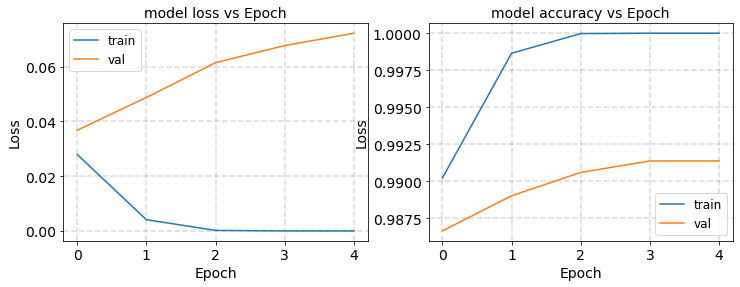

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0566 - accuracy: 0.9885 - val_loss: 0.0261 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0261 - val_accuracy: 0.9946
Epoch 3/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0341 - val_accuracy: 0.9938
Epoch 4/5
1250/1250 - 2s - loss: 1.5890e-04 - accuracy: 0.9999 - val_loss: 0.0464 - val_accuracy: 0.9946
Epoch 5/5
1250/1250 - 2s - loss: 8.1556e-06 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9946


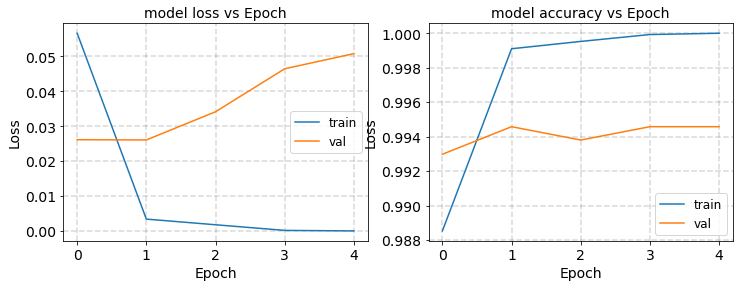

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0740 - accuracy: 0.9835 - val_loss: 0.0678 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 2s - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0541 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0702 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 4.3072e-04 - accuracy: 0.9999 - val_loss: 0.0809 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 1.4511e-05 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9890


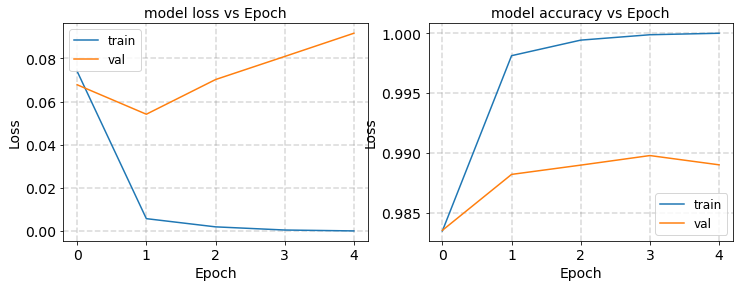

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0712 - accuracy: 0.9877 - val_loss: 0.0301 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 1s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0289 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 2s - loss: 9.5374e-05 - accuracy: 1.0000 - val_loss: 0.0370 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 2s - loss: 1.8162e-05 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 5.8763e-06 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 0.9921


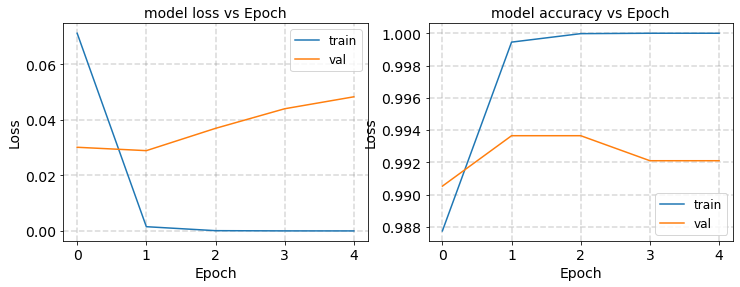

round1 [6 2 4 7]
6
Epoch 1/5
1250/1250 - 1s - loss: 2.3551e-06 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 2s - loss: 1.0452e-06 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 1s - loss: 4.6555e-07 - accuracy: 1.0000 - val_loss: 0.0586 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 1s - loss: 2.2574e-07 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 1.0689e-07 - accuracy: 1.0000 - val_loss: 0.0655 - val_accuracy: 0.9929


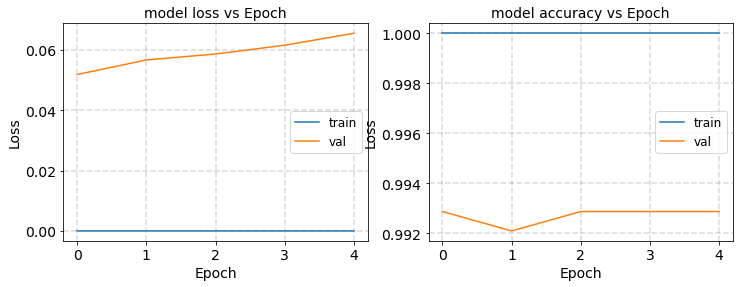

2
Epoch 1/5
1250/1250 - 1s - loss: 0.1007 - accuracy: 0.9853 - val_loss: 0.0586 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 1s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0769 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 2s - loss: 6.6040e-05 - accuracy: 1.0000 - val_loss: 0.1106 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 9.2008e-06 - accuracy: 1.0000 - val_loss: 0.1299 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 2s - loss: 3.0938e-06 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 0.9850


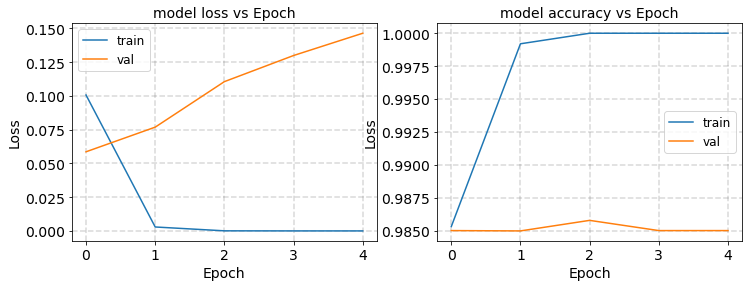

4
Epoch 1/5
1250/1250 - 1s - loss: 0.1134 - accuracy: 0.9785 - val_loss: 0.0436 - val_accuracy: 0.9923
Epoch 2/5
1250/1250 - 1s - loss: 0.0073 - accuracy: 0.9982 - val_loss: 0.0561 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0632 - val_accuracy: 0.9891
Epoch 4/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0850 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 2s - loss: 5.4525e-05 - accuracy: 1.0000 - val_loss: 0.0916 - val_accuracy: 0.9883


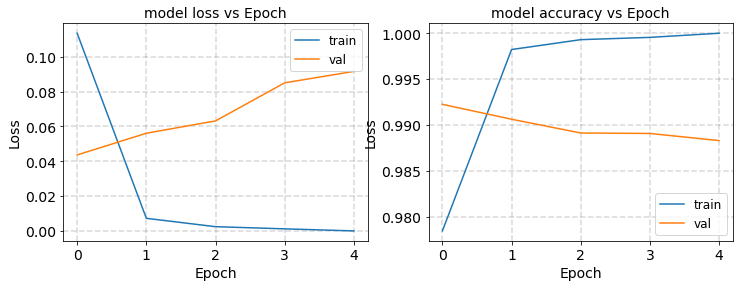

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0634 - accuracy: 0.9898 - val_loss: 0.0524 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.0649 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 6.9918e-04 - accuracy: 0.9998 - val_loss: 0.0785 - val_accuracy: 0.9891
Epoch 4/5
1250/1250 - 2s - loss: 2.1840e-05 - accuracy: 1.0000 - val_loss: 0.0878 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 2s - loss: 4.6624e-06 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 0.9891


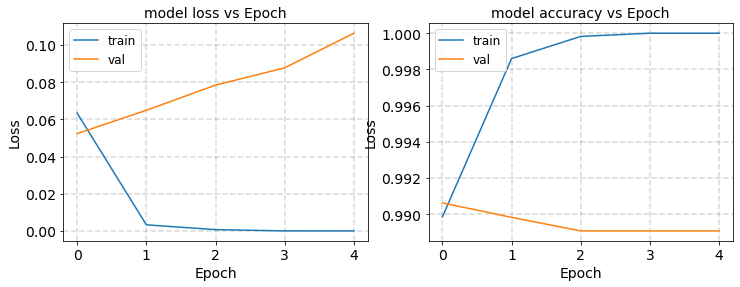

round2 [7 4 2 6]
7
Epoch 1/5
1250/1250 - 2s - loss: 9.0217e-07 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 2s - loss: 2.7246e-07 - accuracy: 1.0000 - val_loss: 0.1285 - val_accuracy: 0.9891
Epoch 3/5
1250/1250 - 2s - loss: 1.0313e-07 - accuracy: 1.0000 - val_loss: 0.1376 - val_accuracy: 0.9891
Epoch 4/5
1250/1250 - 1s - loss: 4.7451e-08 - accuracy: 1.0000 - val_loss: 0.1435 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 2s - loss: 2.3991e-08 - accuracy: 1.0000 - val_loss: 0.1493 - val_accuracy: 0.9891


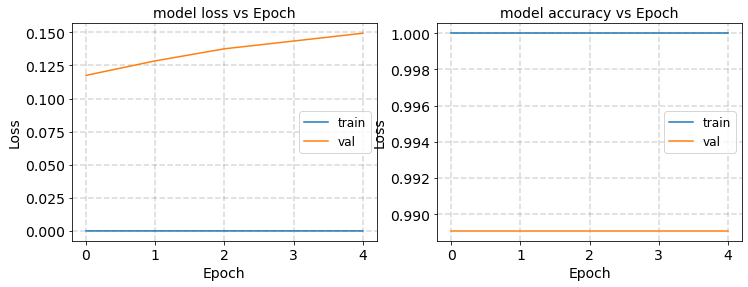

4
Epoch 1/5
1250/1250 - 2s - loss: 0.1069 - accuracy: 0.9866 - val_loss: 0.0584 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0569 - val_accuracy: 0.9899
Epoch 3/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0586 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0823 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0905 - val_accuracy: 0.9867


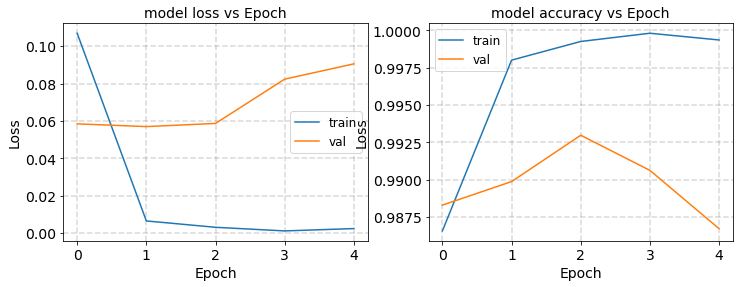

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1283 - accuracy: 0.9648 - val_loss: 0.0750 - val_accuracy: 0.9781
Epoch 2/5
1250/1250 - 2s - loss: 0.0135 - accuracy: 0.9964 - val_loss: 0.0864 - val_accuracy: 0.9835
Epoch 3/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.1152 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.1223 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 2s - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0882 - val_accuracy: 0.9866


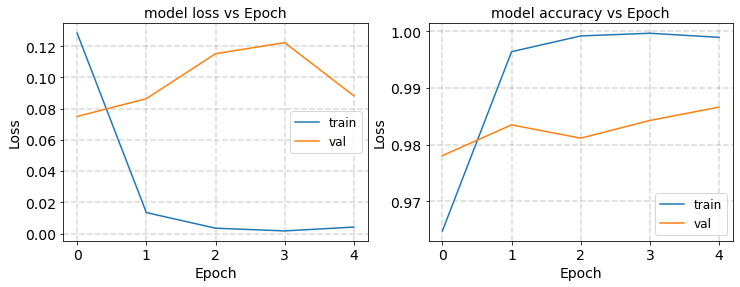

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0650 - accuracy: 0.9862 - val_loss: 0.0304 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0389 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 2s - loss: 7.2670e-05 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 2s - loss: 1.5712e-05 - accuracy: 1.0000 - val_loss: 0.0425 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 5.2296e-06 - accuracy: 1.0000 - val_loss: 0.0463 - val_accuracy: 0.9921


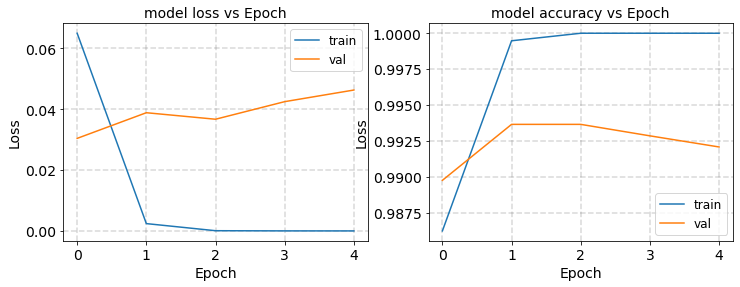

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

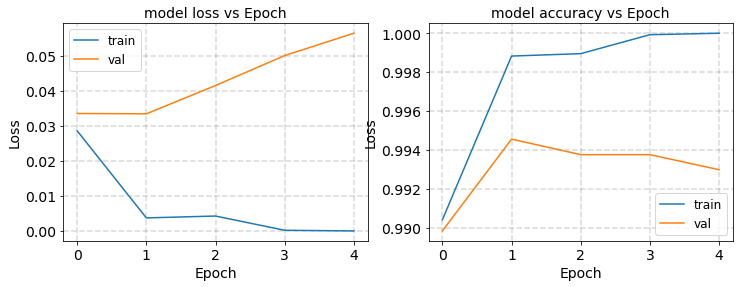

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0492 - accuracy: 0.9905 - val_loss: 0.0353 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0465 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0435 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0392 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 4.7469e-05 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9945


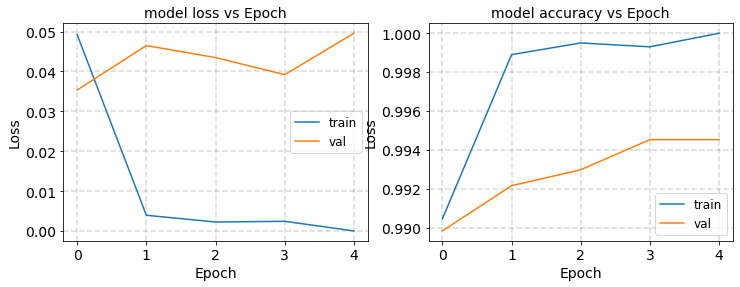

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0554 - accuracy: 0.9887 - val_loss: 0.0510 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0598 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 4.9344e-05 - accuracy: 1.0000 - val_loss: 0.0722 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 1.0816e-05 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 4.0228e-06 - accuracy: 1.0000 - val_loss: 0.0905 - val_accuracy: 0.9905


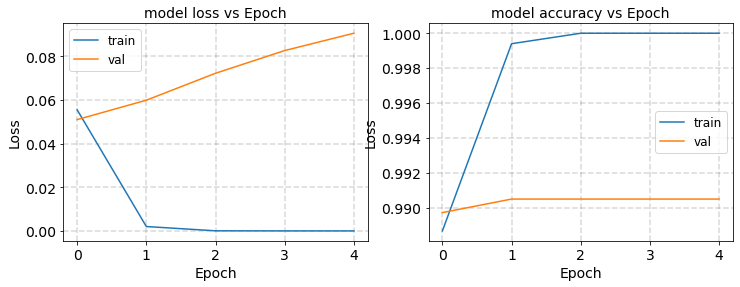

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0785 - accuracy: 0.9858 - val_loss: 0.0722 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0879 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 3.9407e-05 - accuracy: 1.0000 - val_loss: 0.1073 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 2s - loss: 1.1732e-05 - accuracy: 1.0000 - val_loss: 0.1196 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 4.7633e-06 - accuracy: 1.0000 - val_loss: 0.1297 - val_accuracy: 0.9875


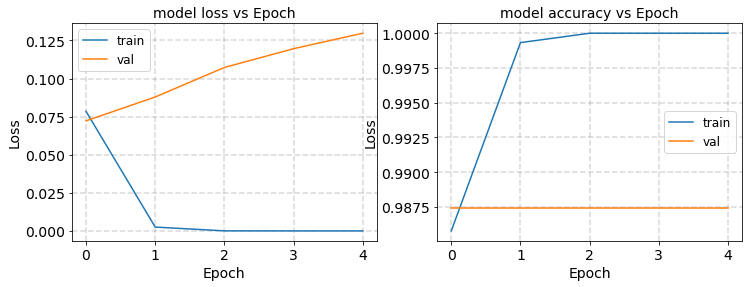

round1 [4 2 7 6]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0907 - accuracy: 0.9834 - val_loss: 0.0483 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 3s - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.0469 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0519 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0722 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 5.1908e-05 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9922


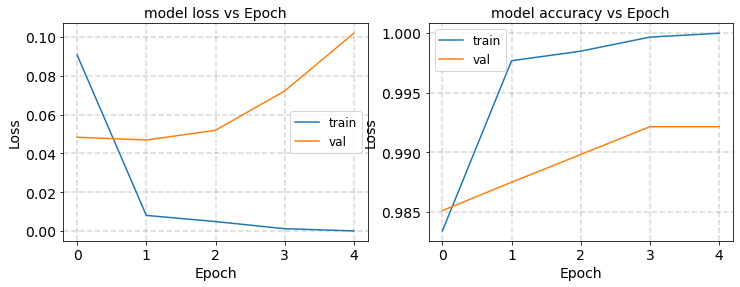

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0925 - accuracy: 0.9864 - val_loss: 0.0498 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0751 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0700 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0668 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 2.0056e-05 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9913


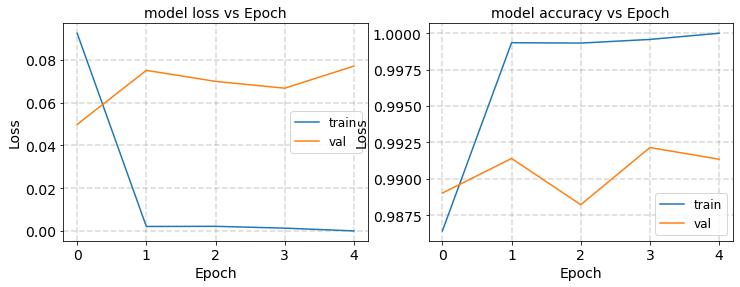

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0896 - accuracy: 0.9860 - val_loss: 0.0316 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.0589 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0631 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.9364e-04 - accuracy: 0.9999 - val_loss: 0.0715 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 2.9957e-05 - accuracy: 1.0000 - val_loss: 0.0870 - val_accuracy: 0.9906


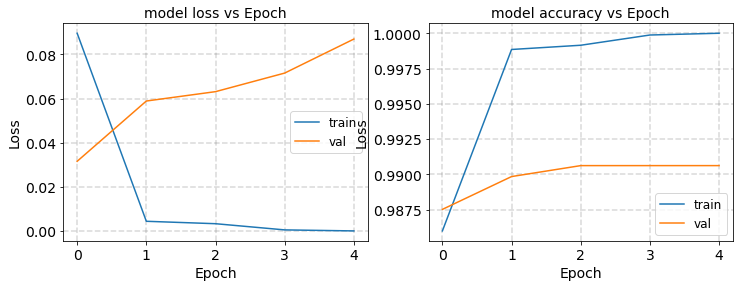

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0651 - accuracy: 0.9901 - val_loss: 0.0345 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0487 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 3s - loss: 2.8057e-05 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 2s - loss: 3.1953e-06 - accuracy: 1.0000 - val_loss: 0.0708 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 6.7656e-07 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9952


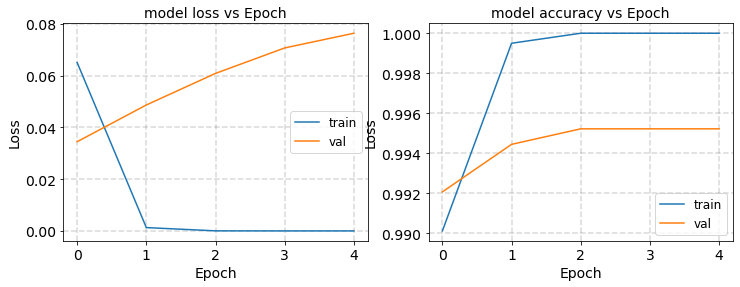

round2 [4 2 7 6]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.1094 - accuracy: 0.9822 - val_loss: 0.0381 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.0426 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0564 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0593 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0670 - val_accuracy: 0.9898


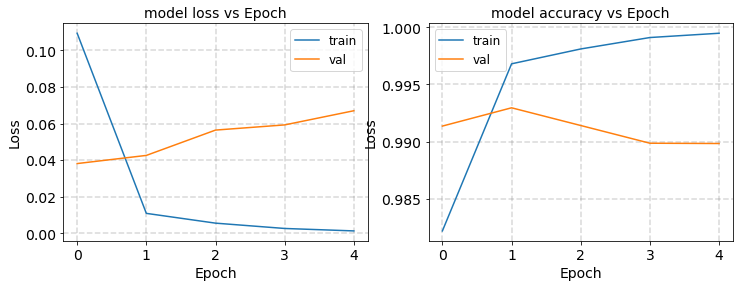

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0811 - accuracy: 0.9842 - val_loss: 0.0692 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1078 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 6.3786e-05 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 2s - loss: 1.7570e-05 - accuracy: 1.0000 - val_loss: 0.1227 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 3s - loss: 6.4953e-06 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 0.9859


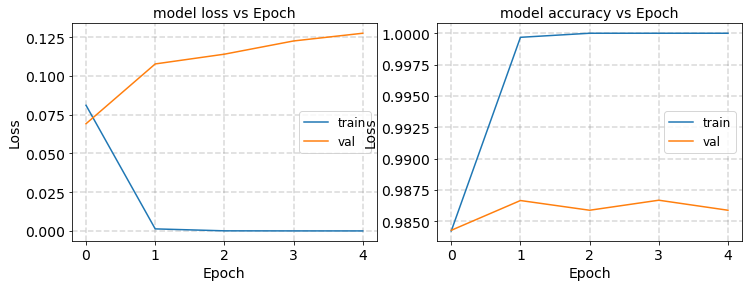

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0910 - accuracy: 0.9893 - val_loss: 0.0417 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0429 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0769 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0631 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 5.0378e-05 - accuracy: 1.0000 - val_loss: 0.0745 - val_accuracy: 0.9930


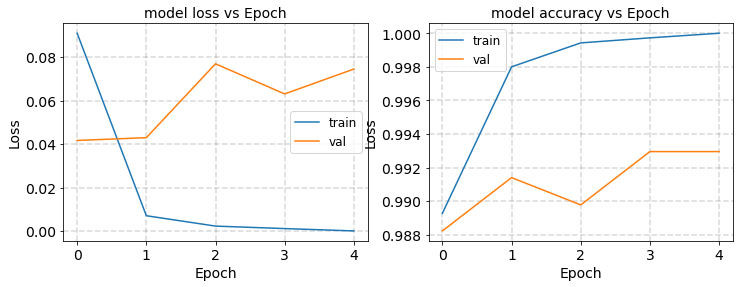

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0724 - accuracy: 0.9892 - val_loss: 0.0488 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0582 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0687 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 7.3243e-04 - accuracy: 0.9998 - val_loss: 0.0674 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 2.2529e-05 - accuracy: 1.0000 - val_loss: 0.0749 - val_accuracy: 0.9929


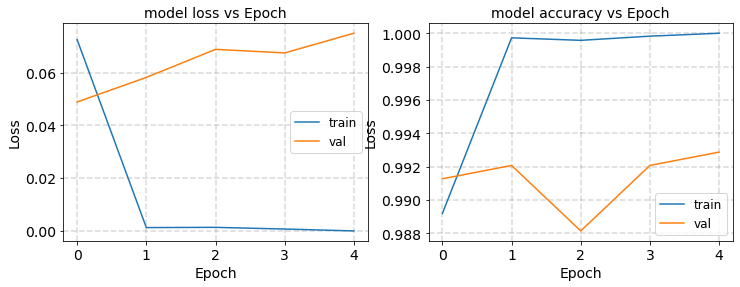

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

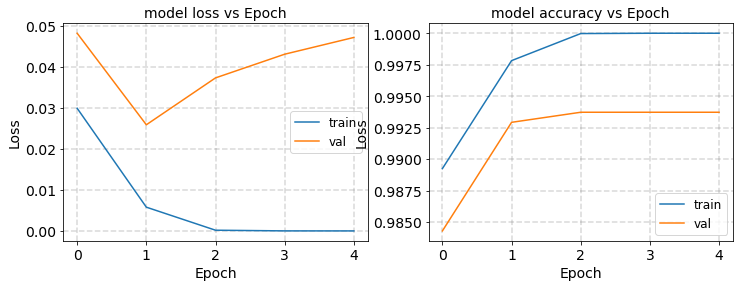

6
Epoch 1/5
1250/1250 - 1s - loss: 0.0549 - accuracy: 0.9897 - val_loss: 0.0221 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0231 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 2s - loss: 4.3355e-05 - accuracy: 1.0000 - val_loss: 0.0265 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 2s - loss: 1.2812e-05 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 2s - loss: 5.0528e-06 - accuracy: 1.0000 - val_loss: 0.0318 - val_accuracy: 0.9929


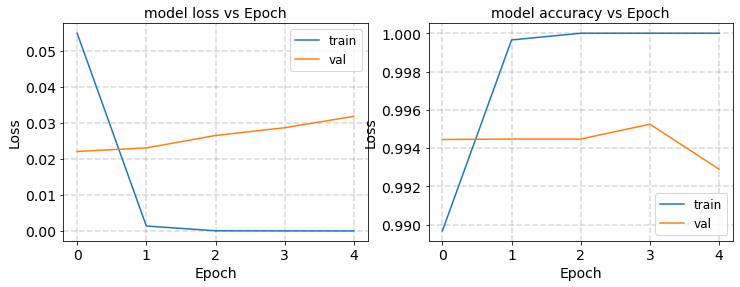

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0828 - accuracy: 0.9868 - val_loss: 0.0481 - val_accuracy: 0.9852
Epoch 2/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0750 - val_accuracy: 0.9868
Epoch 3/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0854 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 2s - loss: 1.1554e-04 - accuracy: 1.0000 - val_loss: 0.1177 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 2s - loss: 1.4217e-05 - accuracy: 1.0000 - val_loss: 0.1387 - val_accuracy: 0.9883


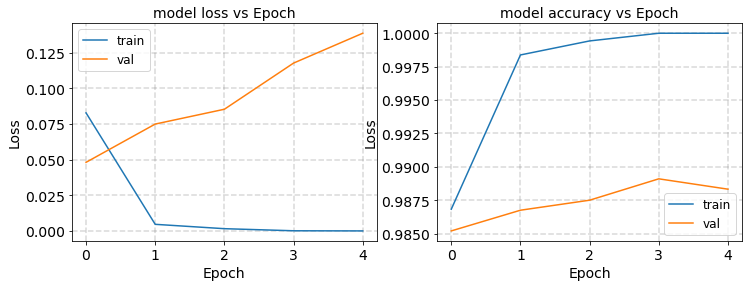

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0934 - accuracy: 0.9842 - val_loss: 0.0387 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0122 - accuracy: 0.9970 - val_loss: 0.0453 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.0501 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 2s - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0523 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0682 - val_accuracy: 0.9891


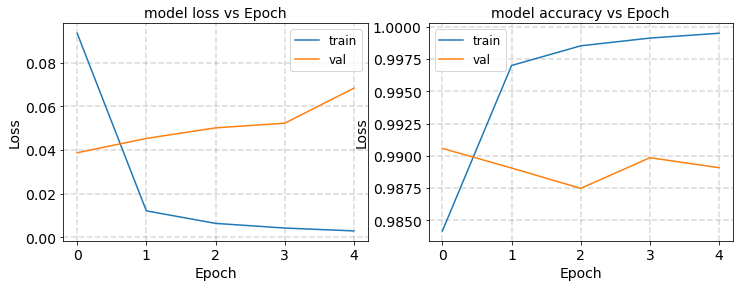

round1 [6 7 4 2]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.0629 - accuracy: 0.9833 - val_loss: 0.0414 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0476 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0745 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 8.6883e-04 - accuracy: 0.9998 - val_loss: 0.0883 - val_accuracy: 0.9913


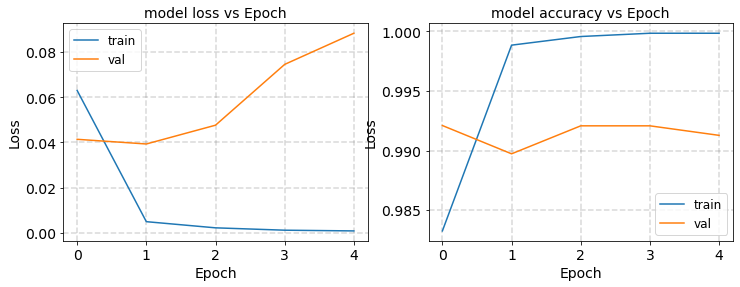

7
Epoch 1/5
1250/1250 - 3s - loss: 0.1569 - accuracy: 0.9776 - val_loss: 0.0311 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0555 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0622 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 4.9012e-04 - accuracy: 0.9997 - val_loss: 0.0836 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 2.9069e-04 - accuracy: 0.9997 - val_loss: 0.0949 - val_accuracy: 0.9898


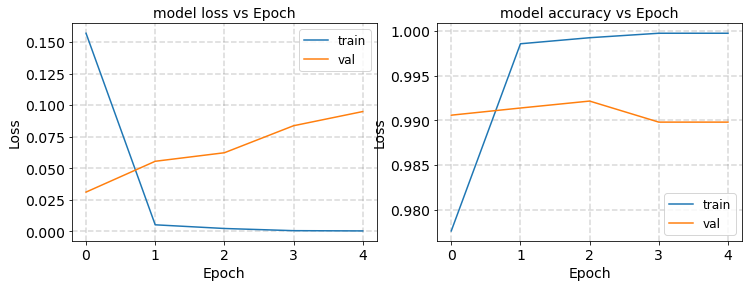

4
Epoch 1/5
1250/1250 - 2s - loss: 0.1024 - accuracy: 0.9822 - val_loss: 0.0533 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.0725 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0868 - val_accuracy: 0.9844
Epoch 4/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0894 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.1027 - val_accuracy: 0.9851


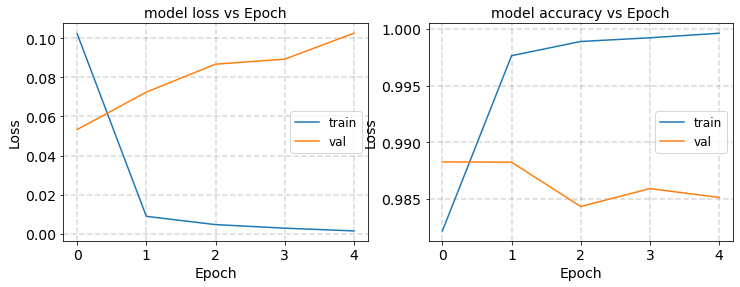

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1554 - accuracy: 0.9643 - val_loss: 0.0606 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0150 - accuracy: 0.9966 - val_loss: 0.0601 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 3s - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0749 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0849 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 1.7979e-04 - accuracy: 1.0000 - val_loss: 0.1172 - val_accuracy: 0.9883


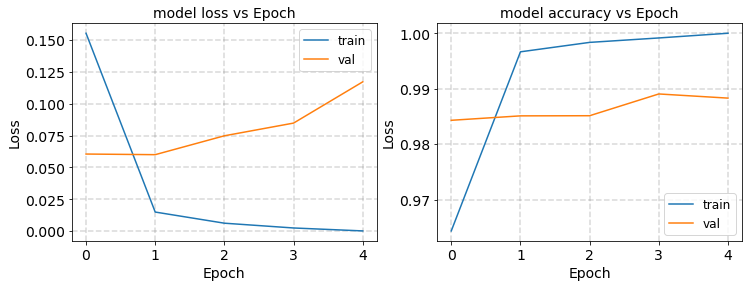

round2 [6 2 7 4]
6
Epoch 1/5
1250/1250 - 3s - loss: 0.0751 - accuracy: 0.9849 - val_loss: 0.0632 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 2s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0624 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0597 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 3.7042e-04 - accuracy: 0.9999 - val_loss: 0.0743 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 4.4933e-05 - accuracy: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.9897


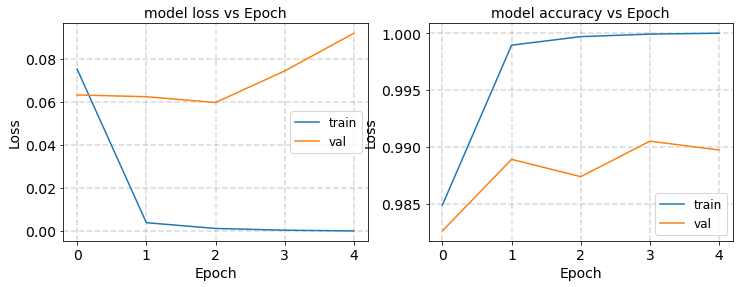

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0950 - accuracy: 0.9861 - val_loss: 0.0860 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.1417 - val_accuracy: 0.9835
Epoch 3/5
1250/1250 - 3s - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.1286 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 3s - loss: 3.4205e-04 - accuracy: 0.9999 - val_loss: 0.1727 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 2.4623e-05 - accuracy: 1.0000 - val_loss: 0.2254 - val_accuracy: 0.9875


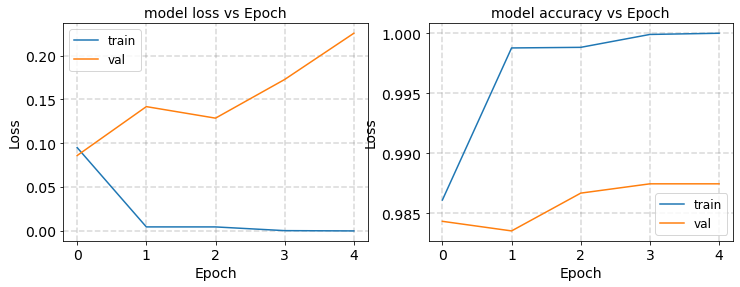

7
Epoch 1/5
1250/1250 - 2s - loss: 0.1227 - accuracy: 0.9841 - val_loss: 0.0381 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0630 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0747 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 1.9063e-04 - accuracy: 1.0000 - val_loss: 0.0966 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 4.4572e-05 - accuracy: 1.0000 - val_loss: 0.1147 - val_accuracy: 0.9921


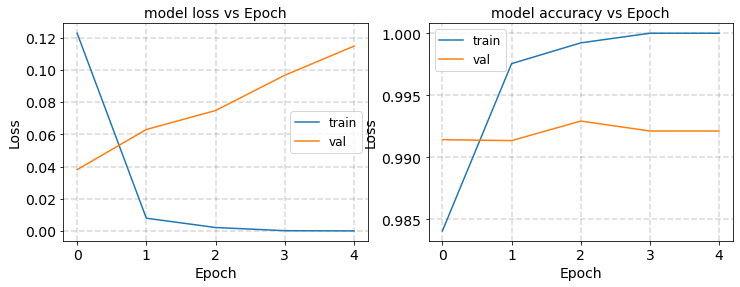

4
Epoch 1/5
1250/1250 - 3s - loss: 0.1344 - accuracy: 0.9658 - val_loss: 0.0702 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 3s - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.0792 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1132 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.1364 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.1377 - val_accuracy: 0.9859


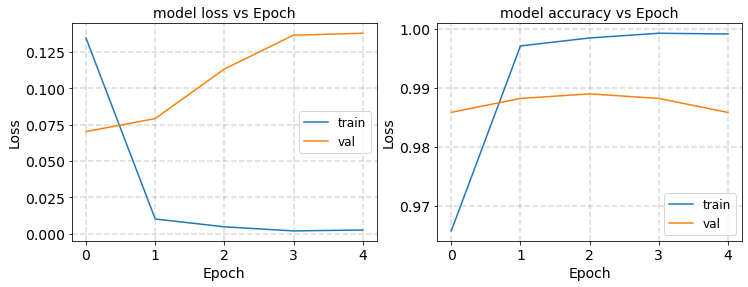

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

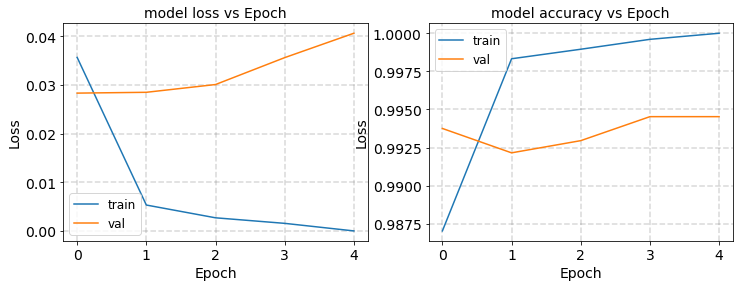

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0469 - accuracy: 0.9912 - val_loss: 0.0401 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0447 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 5.9288e-04 - accuracy: 0.9998 - val_loss: 0.0591 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 2s - loss: 1.8353e-05 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 4.8358e-06 - accuracy: 1.0000 - val_loss: 0.0681 - val_accuracy: 0.9930


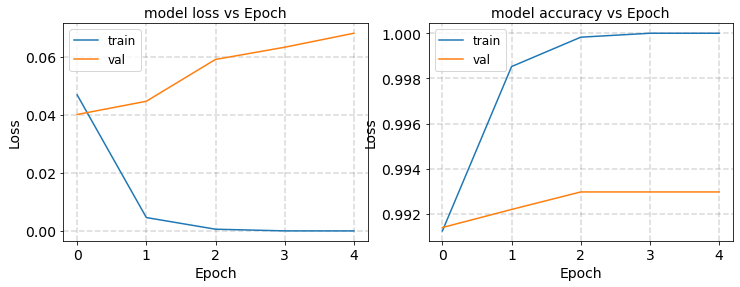

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0670 - accuracy: 0.9909 - val_loss: 0.0381 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 2s - loss: 6.1133e-04 - accuracy: 0.9998 - val_loss: 0.0448 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 2.6626e-05 - accuracy: 1.0000 - val_loss: 0.0539 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 7.0298e-06 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 2.7190e-06 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9913


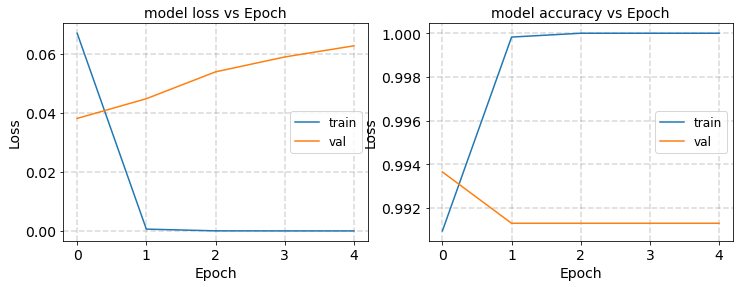

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0995 - accuracy: 0.9829 - val_loss: 0.0593 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0633 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 3.9084e-05 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 8.8787e-06 - accuracy: 1.0000 - val_loss: 0.0870 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 3.3735e-06 - accuracy: 1.0000 - val_loss: 0.0987 - val_accuracy: 0.9890


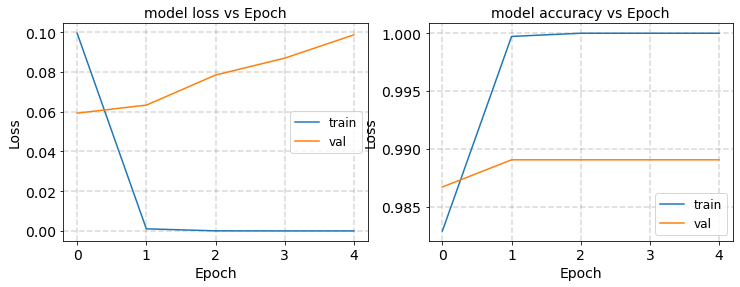

round1 [2 7 6 4]
2
Epoch 1/5
1250/1250 - 2s - loss: 1.4930e-06 - accuracy: 1.0000 - val_loss: 0.1053 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 6.4585e-07 - accuracy: 1.0000 - val_loss: 0.1121 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 2s - loss: 2.9035e-07 - accuracy: 1.0000 - val_loss: 0.1201 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 1.3622e-07 - accuracy: 1.0000 - val_loss: 0.1281 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 6.7241e-08 - accuracy: 1.0000 - val_loss: 0.1364 - val_accuracy: 0.9890


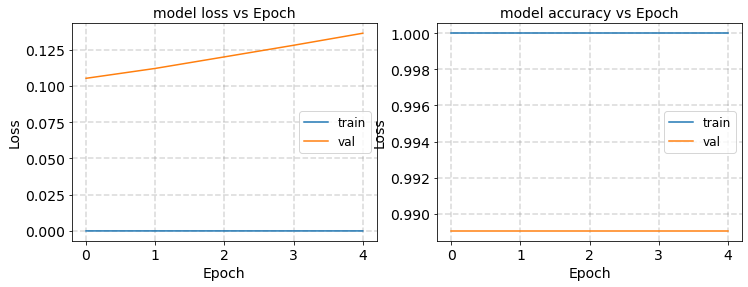

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0829 - accuracy: 0.9898 - val_loss: 0.0474 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0448 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 5.6575e-04 - accuracy: 0.9998 - val_loss: 0.0518 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 2s - loss: 1.7056e-05 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 5.7203e-06 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 0.9914


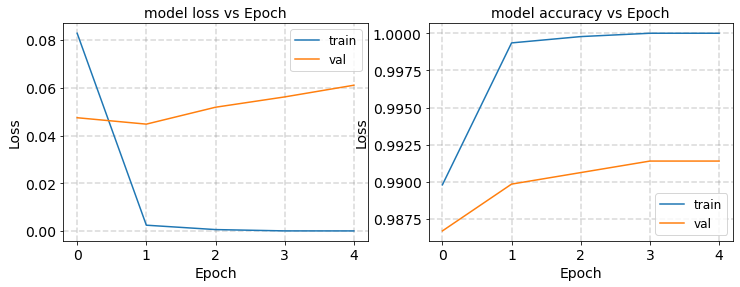

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0712 - accuracy: 0.9916 - val_loss: 0.0307 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 5.3667e-04 - accuracy: 0.9998 - val_loss: 0.0432 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 2s - loss: 3.3642e-05 - accuracy: 1.0000 - val_loss: 0.0531 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 2s - loss: 9.7701e-06 - accuracy: 1.0000 - val_loss: 0.0597 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 2s - loss: 3.8144e-06 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 0.9944


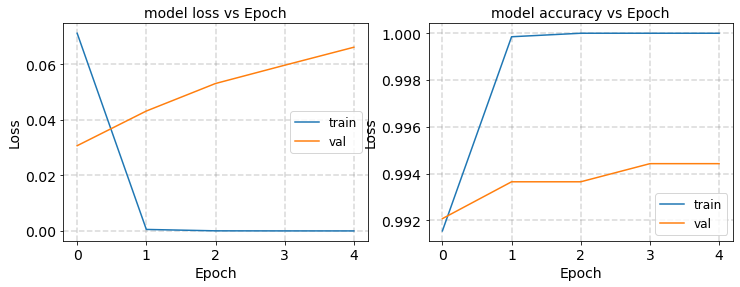

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0979 - accuracy: 0.9813 - val_loss: 0.0306 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 0.0069 - accuracy: 0.9981 - val_loss: 0.0402 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0554 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 1.9565e-04 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 1.5728e-05 - accuracy: 1.0000 - val_loss: 0.0821 - val_accuracy: 0.9914


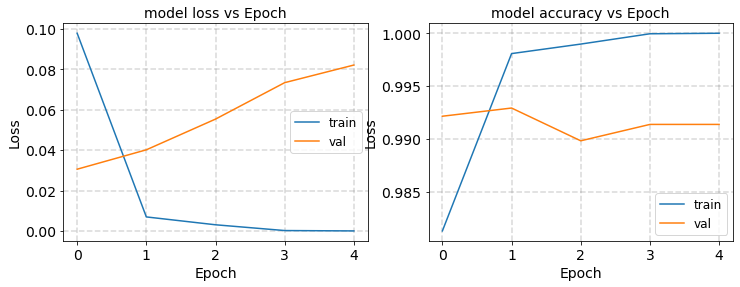

round2 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 2s - loss: 5.5758e-06 - accuracy: 1.0000 - val_loss: 0.0896 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 2.3110e-06 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 1.0452e-06 - accuracy: 1.0000 - val_loss: 0.1035 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 4.9172e-07 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 2.3582e-07 - accuracy: 1.0000 - val_loss: 0.1161 - val_accuracy: 0.9914


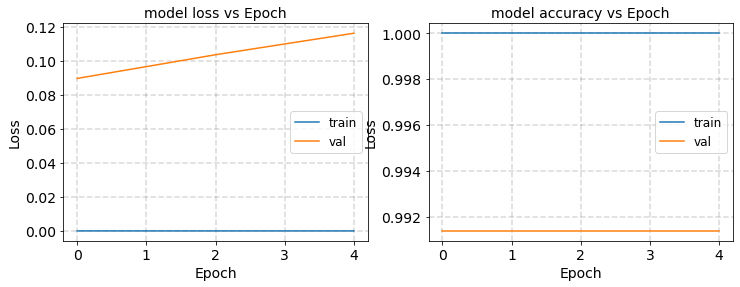

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0746 - accuracy: 0.9905 - val_loss: 0.0501 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 2s - loss: 2.6074e-04 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 2s - loss: 7.0169e-05 - accuracy: 1.0000 - val_loss: 0.0724 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 3.4900e-05 - accuracy: 1.0000 - val_loss: 0.0795 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 1.5486e-05 - accuracy: 1.0000 - val_loss: 0.0932 - val_accuracy: 0.9913


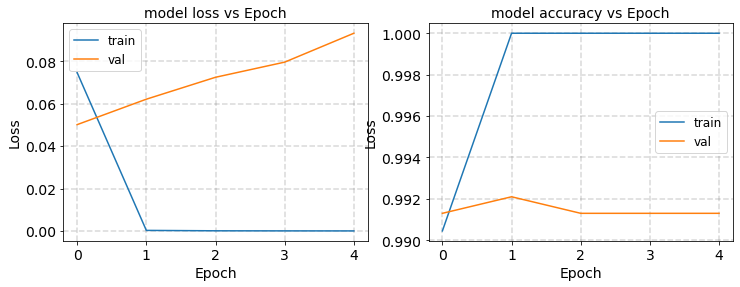

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1576 - accuracy: 0.9700 - val_loss: 0.0472 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0089 - accuracy: 0.9979 - val_loss: 0.0468 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0651 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0838 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 3.8901e-05 - accuracy: 1.0000 - val_loss: 0.1068 - val_accuracy: 0.9906


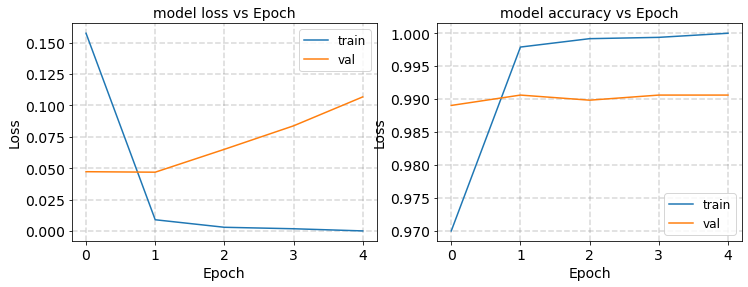

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0862 - accuracy: 0.9872 - val_loss: 0.0364 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0482 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 5.0473e-04 - accuracy: 0.9998 - val_loss: 0.0573 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 3.0858e-05 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 2s - loss: 1.0522e-05 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9906


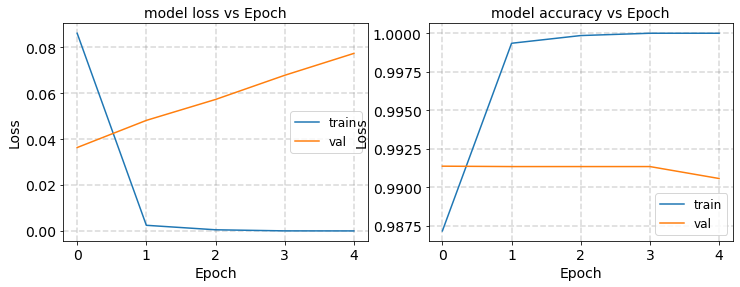

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

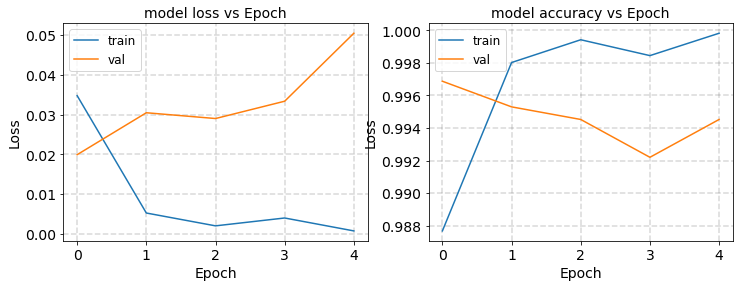

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0465 - accuracy: 0.9912 - val_loss: 0.0428 - val_accuracy: 0.9920
Epoch 2/5
1250/1250 - 2s - loss: 8.5305e-04 - accuracy: 0.9998 - val_loss: 0.0457 - val_accuracy: 0.9928
Epoch 3/5
1250/1250 - 2s - loss: 3.4366e-05 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 2s - loss: 1.1457e-05 - accuracy: 1.0000 - val_loss: 0.0614 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 2s - loss: 4.6308e-06 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 0.9920


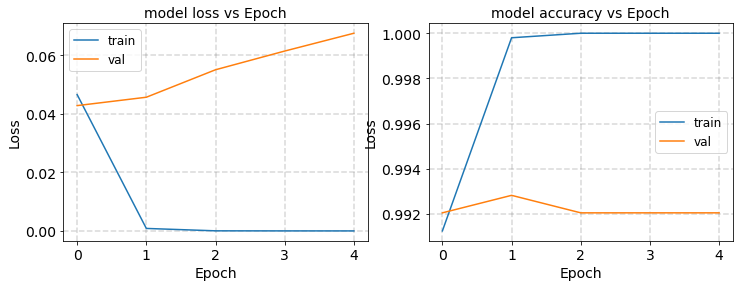

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0714 - accuracy: 0.9880 - val_loss: 0.0505 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0499 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0613 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 2.3138e-04 - accuracy: 0.9999 - val_loss: 0.0815 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 8.0755e-06 - accuracy: 1.0000 - val_loss: 0.0874 - val_accuracy: 0.9914


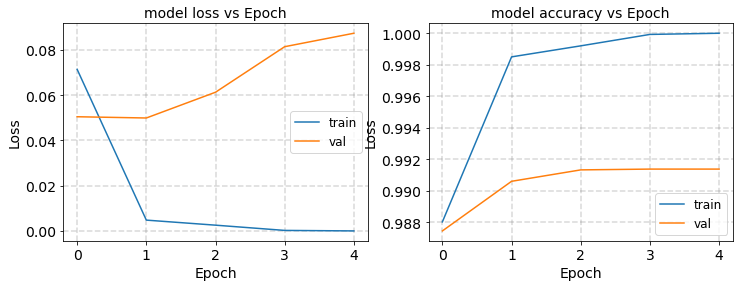

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0782 - accuracy: 0.9887 - val_loss: 0.0294 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0392 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 8.3723e-05 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 1.5326e-05 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 4.9007e-06 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 0.9922


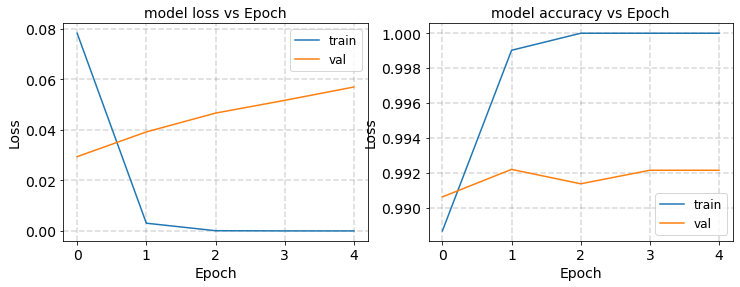

round1 [6 2 7 4]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.0621 - accuracy: 0.9910 - val_loss: 0.0539 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0403 - val_accuracy: 0.9952
Epoch 3/5
1250/1250 - 2s - loss: 2.4543e-04 - accuracy: 0.9999 - val_loss: 0.0535 - val_accuracy: 0.9952
Epoch 4/5
1250/1250 - 2s - loss: 1.7778e-05 - accuracy: 1.0000 - val_loss: 0.0630 - val_accuracy: 0.9952
Epoch 5/5
1250/1250 - 3s - loss: 4.8217e-06 - accuracy: 1.0000 - val_loss: 0.0701 - val_accuracy: 0.9952


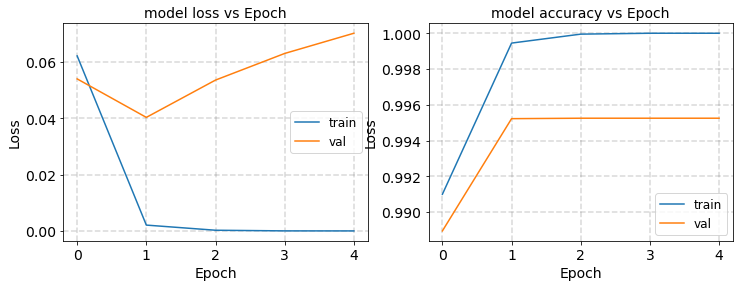

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0791 - accuracy: 0.9897 - val_loss: 0.0690 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 7.7613e-04 - accuracy: 0.9997 - val_loss: 0.0897 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 2.2366e-05 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 6.9552e-06 - accuracy: 1.0000 - val_loss: 0.1091 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 2.7421e-06 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 0.9882


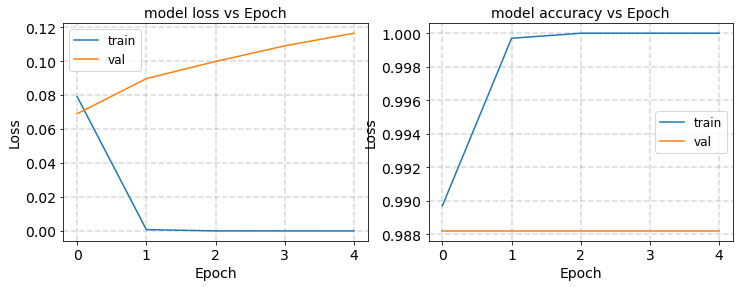

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0759 - accuracy: 0.9885 - val_loss: 0.0349 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 2s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0529 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 9.8024e-04 - accuracy: 0.9998 - val_loss: 0.0792 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0833 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 2.2998e-05 - accuracy: 1.0000 - val_loss: 0.0965 - val_accuracy: 0.9914


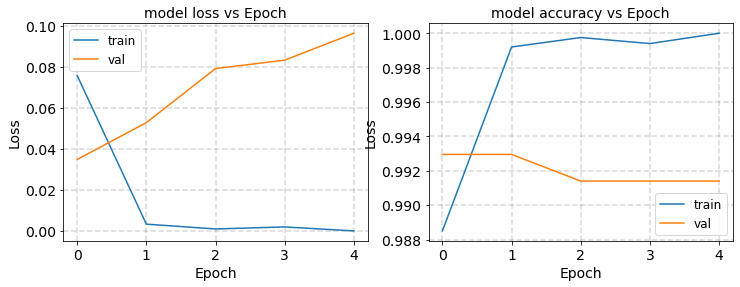

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0738 - accuracy: 0.9864 - val_loss: 0.0410 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 2s - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0528 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0623 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0603 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 2s - loss: 2.2372e-04 - accuracy: 1.0000 - val_loss: 0.0796 - val_accuracy: 0.9883


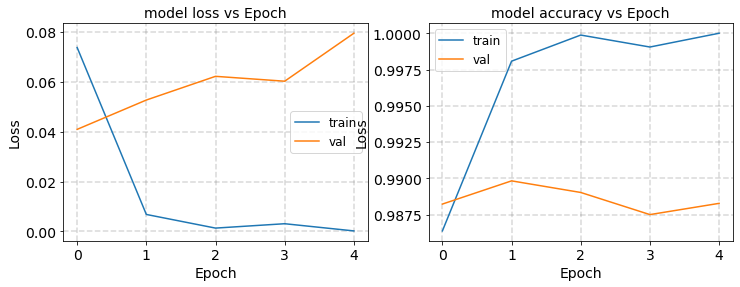

round2 [6 7 4 2]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.0663 - accuracy: 0.9891 - val_loss: 0.0355 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 2s - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0344 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 2s - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0537 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 2s - loss: 8.3472e-04 - accuracy: 0.9998 - val_loss: 0.0570 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 2s - loss: 1.8516e-05 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9944


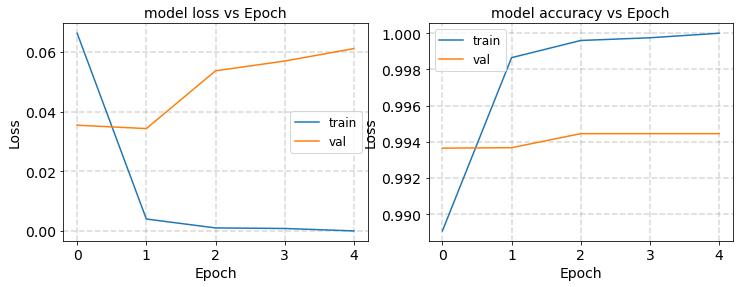

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0808 - accuracy: 0.9861 - val_loss: 0.0474 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0787 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0878 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0804 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 7.8666e-05 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9883


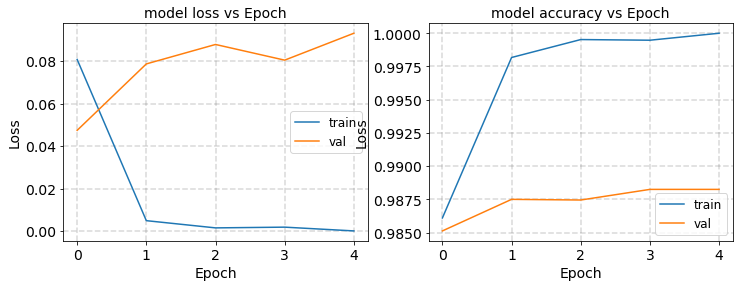

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0850 - accuracy: 0.9897 - val_loss: 0.0679 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0850 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.1123 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.1309 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1391 - val_accuracy: 0.9906


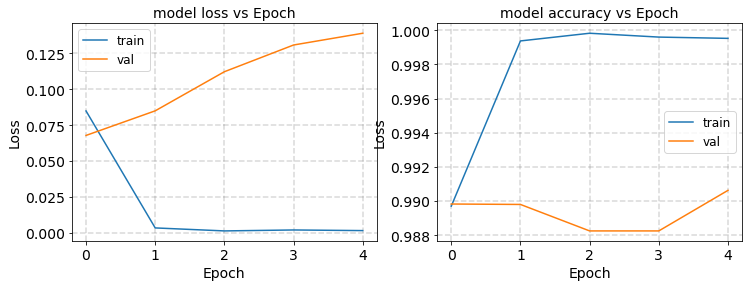

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1154 - accuracy: 0.9840 - val_loss: 0.0644 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.1055 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1645 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 3s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.1519 - val_accuracy: 0.9835
Epoch 5/5
1250/1250 - 3s - loss: 5.8246e-04 - accuracy: 0.9999 - val_loss: 0.1830 - val_accuracy: 0.9827


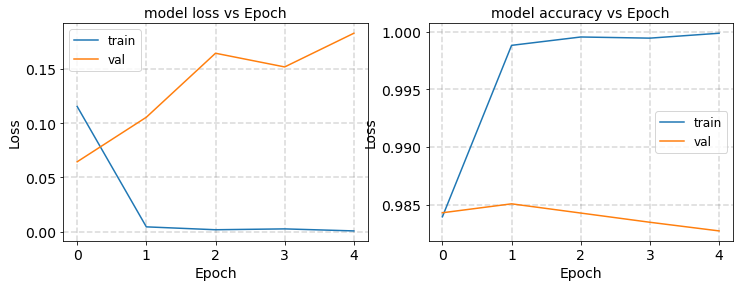

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
__________________________________________________

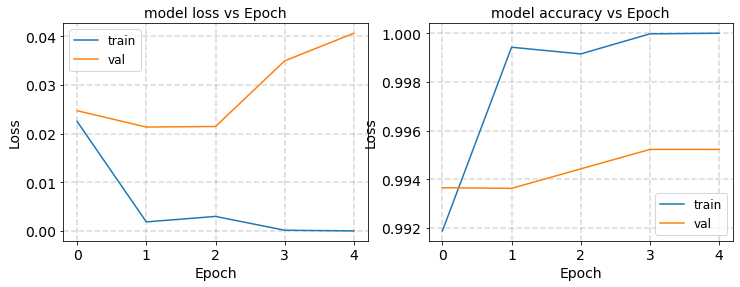

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0551 - accuracy: 0.9872 - val_loss: 0.0460 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0778 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0816 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 3s - loss: 5.5682e-05 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 1.1847e-05 - accuracy: 1.0000 - val_loss: 0.1114 - val_accuracy: 0.9874


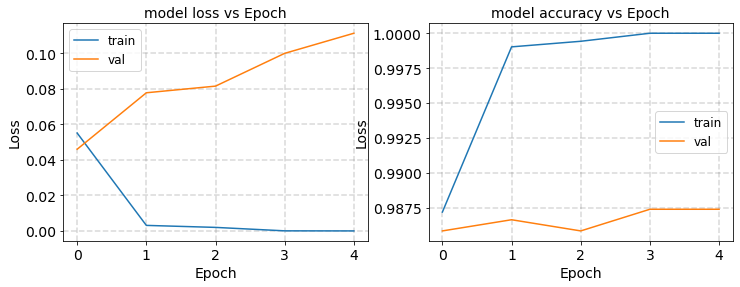

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0713 - accuracy: 0.9859 - val_loss: 0.0264 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0368 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0536 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 7.1651e-05 - accuracy: 1.0000 - val_loss: 0.0616 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 1.3674e-05 - accuracy: 1.0000 - val_loss: 0.0701 - val_accuracy: 0.9898


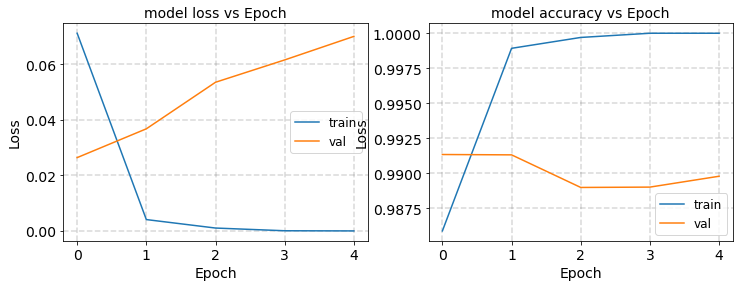

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0795 - accuracy: 0.9866 - val_loss: 0.0481 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.0614 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0756 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 2s - loss: 2.2417e-04 - accuracy: 0.9999 - val_loss: 0.1041 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 1.7402e-05 - accuracy: 1.0000 - val_loss: 0.1270 - val_accuracy: 0.9883


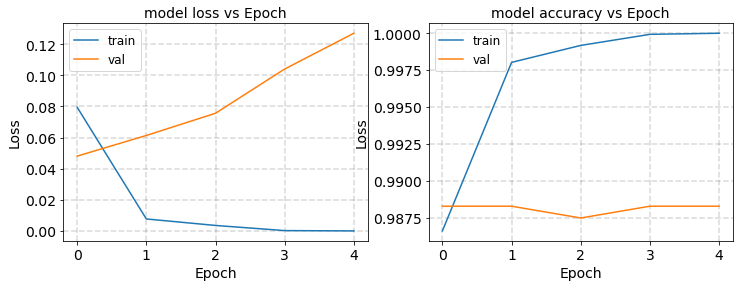

round1 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0763 - accuracy: 0.9862 - val_loss: 0.0400 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0461 - val_accuracy: 0.9899
Epoch 3/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0570 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 2.2094e-04 - accuracy: 0.9999 - val_loss: 0.0671 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 6.9236e-05 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9930


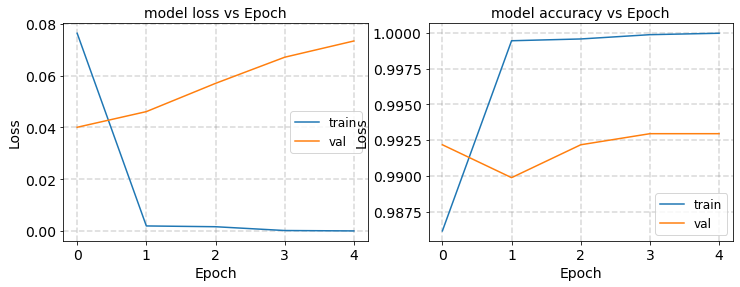

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0672 - accuracy: 0.9892 - val_loss: 0.0310 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 2s - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0391 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0467 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0488 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0556 - val_accuracy: 0.9929


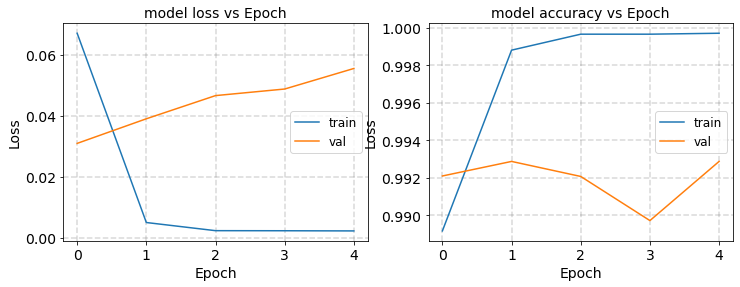

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0914 - accuracy: 0.9855 - val_loss: 0.0597 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0759 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0883 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0975 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0754 - val_accuracy: 0.9843


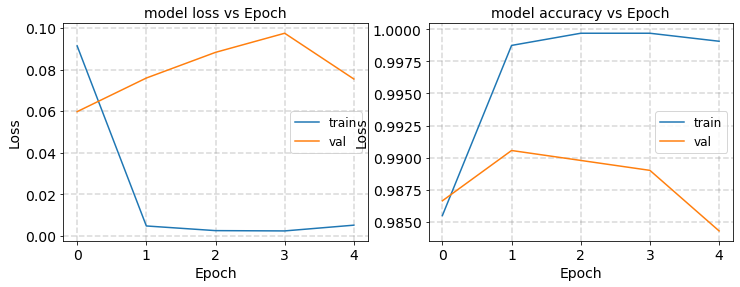

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0846 - accuracy: 0.9799 - val_loss: 0.0469 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0530 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0589 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0784 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0778 - val_accuracy: 0.9922


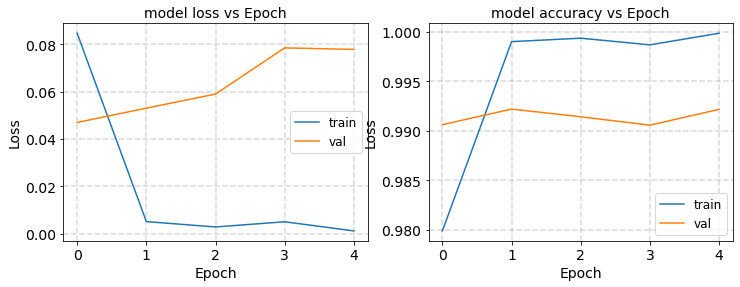

round2 [7 2 4 6]
7
Epoch 1/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0712 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0868 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0661 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0612 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 8.5909e-04 - accuracy: 0.9999 - val_loss: 0.0713 - val_accuracy: 0.9922


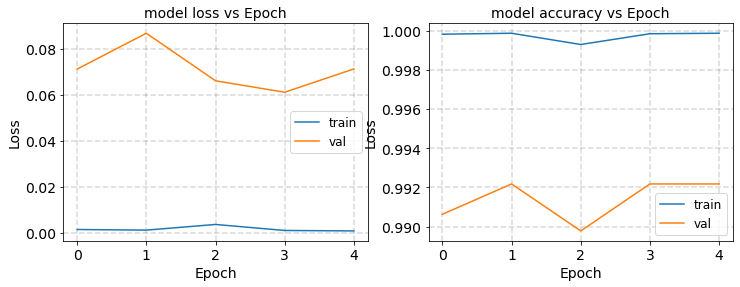

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1250 - accuracy: 0.9714 - val_loss: 0.0660 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 2s - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.0750 - val_accuracy: 0.9844
Epoch 3/5
1250/1250 - 2s - loss: 0.0072 - accuracy: 0.9984 - val_loss: 0.1005 - val_accuracy: 0.9844
Epoch 4/5
1250/1250 - 2s - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.1116 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.1212 - val_accuracy: 0.9851


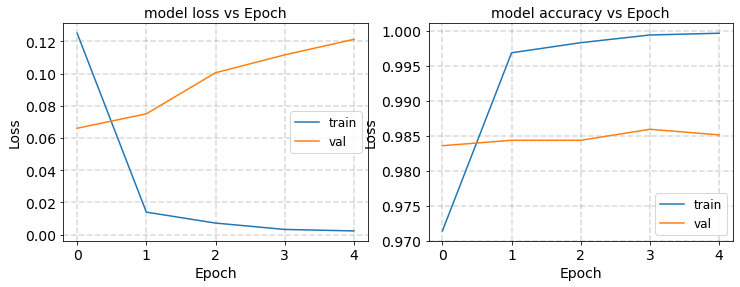

4
Epoch 1/5
1250/1250 - 2s - loss: 0.1306 - accuracy: 0.9601 - val_loss: 0.0605 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 2s - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0708 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0769 - val_accuracy: 0.9835
Epoch 4/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0827 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0954 - val_accuracy: 0.9843


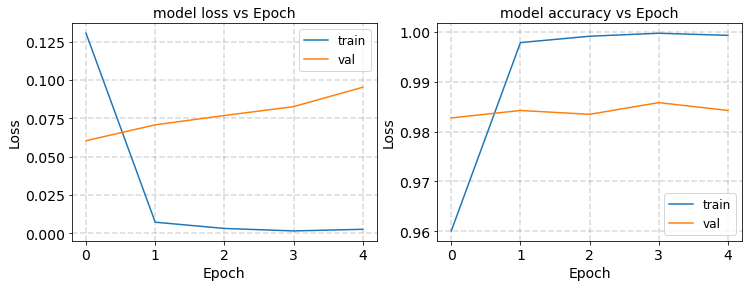

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0956 - accuracy: 0.9768 - val_loss: 0.0319 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0404 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0494 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 0.0060 - accuracy: 0.9988 - val_loss: 0.0418 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0610 - val_accuracy: 0.9937


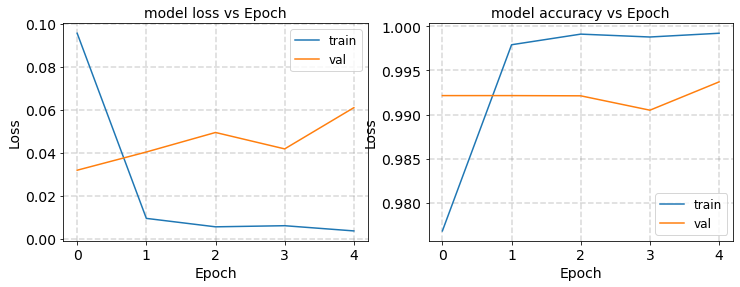

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

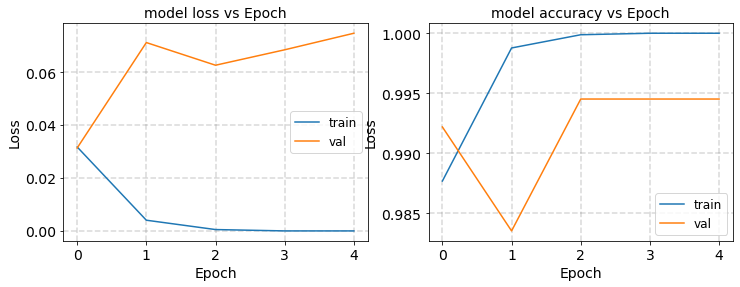

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0628 - accuracy: 0.9894 - val_loss: 0.0479 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0361 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 2s - loss: 6.7931e-05 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 1.0750e-05 - accuracy: 1.0000 - val_loss: 0.0541 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 4.2515e-06 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9921


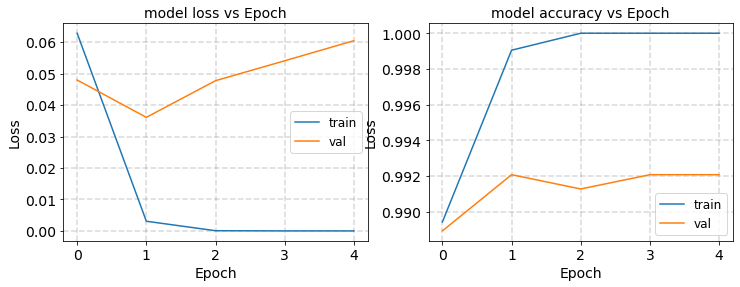

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0762 - accuracy: 0.9854 - val_loss: 0.0478 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 2s - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.0523 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0661 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 2s - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0897 - val_accuracy: 0.9812
Epoch 5/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0673 - val_accuracy: 0.9930


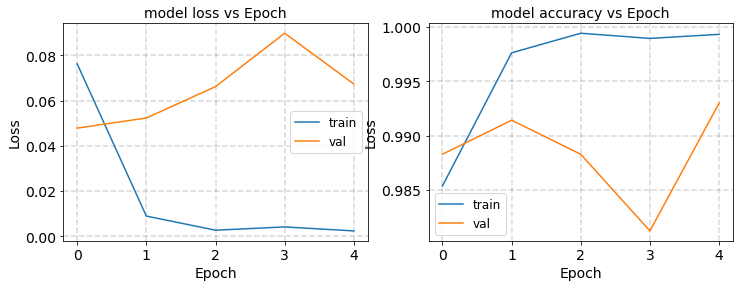

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1034 - accuracy: 0.9781 - val_loss: 0.0440 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 2s - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0511 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0708 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0599 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 2s - loss: 6.6901e-05 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9897


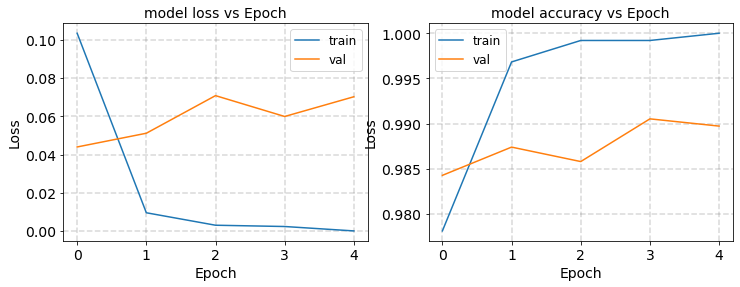

round1 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.0935 - accuracy: 0.9781 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0486 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0557 - val_accuracy: 0.9915
Epoch 4/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0732 - val_accuracy: 0.9899
Epoch 5/5
1250/1250 - 2s - loss: 6.6468e-04 - accuracy: 0.9998 - val_loss: 0.0710 - val_accuracy: 0.9883


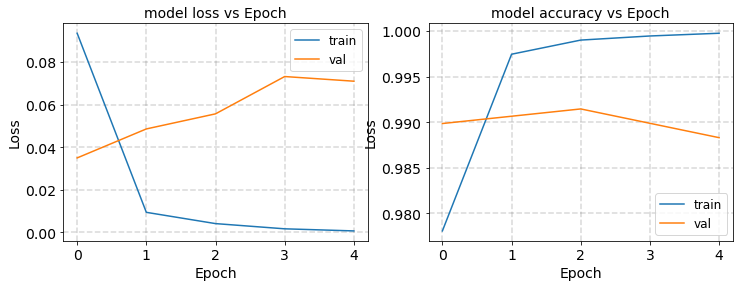

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1096 - accuracy: 0.9794 - val_loss: 0.0415 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 2s - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.0494 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0534 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 9.2611e-04 - accuracy: 0.9998 - val_loss: 0.0708 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0581 - val_accuracy: 0.9913


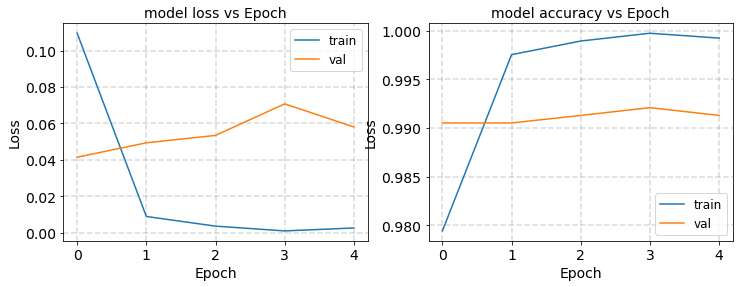

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1047 - accuracy: 0.9796 - val_loss: 0.0606 - val_accuracy: 0.9827
Epoch 2/5
1250/1250 - 2s - loss: 0.0106 - accuracy: 0.9976 - val_loss: 0.0681 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0825 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.1002 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 1.3989e-04 - accuracy: 0.9999 - val_loss: 0.1300 - val_accuracy: 0.9882


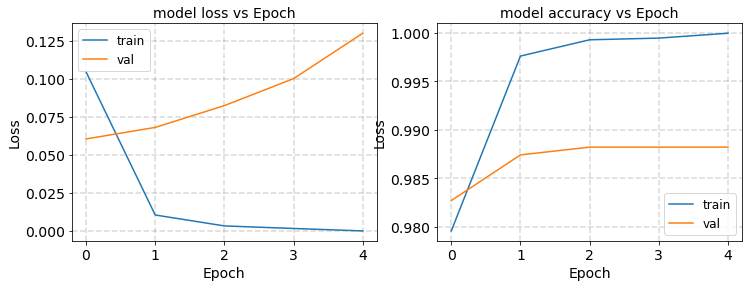

7
Epoch 1/5
1250/1250 - 2s - loss: 0.1240 - accuracy: 0.9779 - val_loss: 0.0358 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 2s - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0477 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0494 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0502 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0524 - val_accuracy: 0.9922


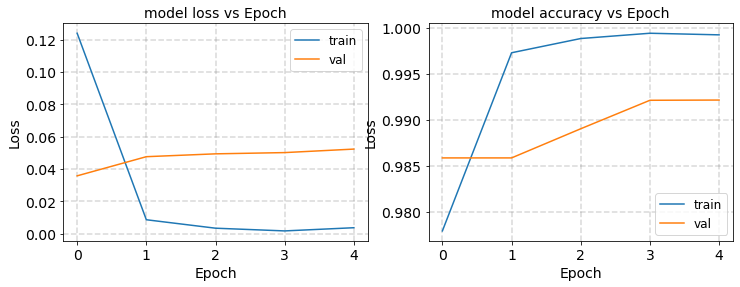

round2 [7 4 2 6]
7
Epoch 1/5
1250/1250 - 2s - loss: 7.9444e-05 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 2.3867e-05 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 1.0003e-05 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 4.2215e-06 - accuracy: 1.0000 - val_loss: 0.0909 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 2.2084e-06 - accuracy: 1.0000 - val_loss: 0.0977 - val_accuracy: 0.9914


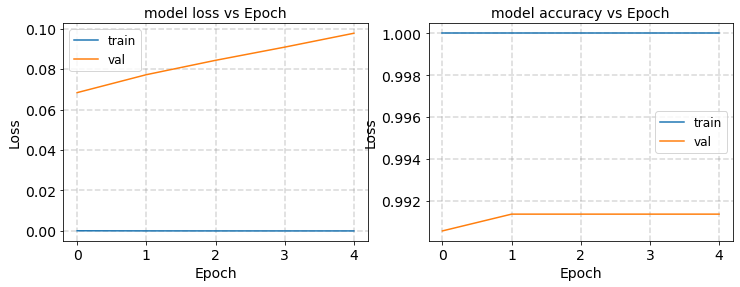

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0937 - accuracy: 0.9859 - val_loss: 0.0570 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 2s - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0653 - val_accuracy: 0.9868
Epoch 3/5
1250/1250 - 2s - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.0794 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9989 - val_loss: 0.1058 - val_accuracy: 0.9860
Epoch 5/5
1250/1250 - 2s - loss: 0.0021 - accuracy: 0.9990 - val_loss: 0.1153 - val_accuracy: 0.9875


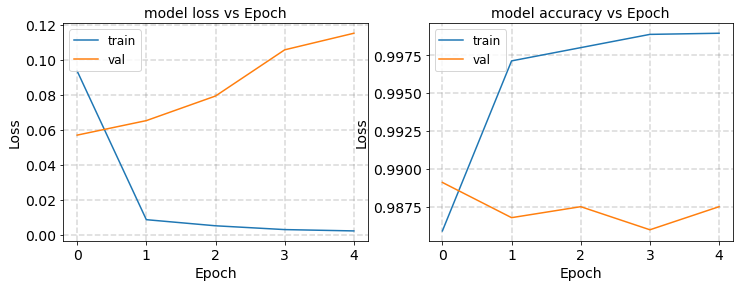

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1251 - accuracy: 0.9799 - val_loss: 0.0672 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 2s - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.0630 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 2s - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.0902 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1126 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 2.2161e-04 - accuracy: 1.0000 - val_loss: 0.1263 - val_accuracy: 0.9882


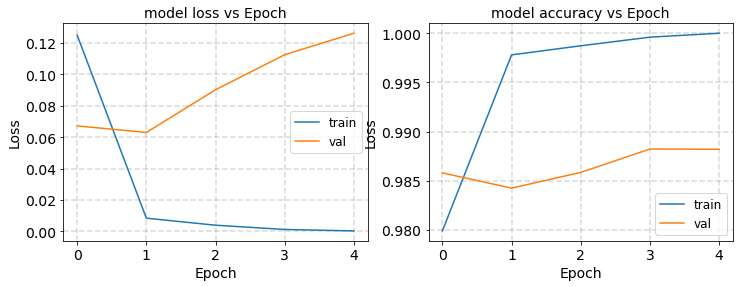

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0849 - accuracy: 0.9887 - val_loss: 0.0488 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 2s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0626 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 2s - loss: 6.9876e-04 - accuracy: 0.9998 - val_loss: 0.0860 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 1.8218e-04 - accuracy: 0.9999 - val_loss: 0.0954 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 2s - loss: 1.0952e-05 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 0.9897


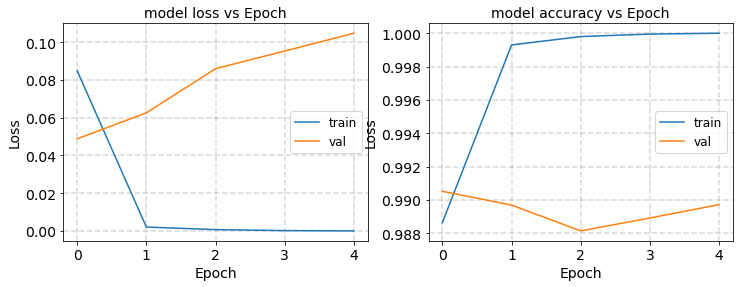

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

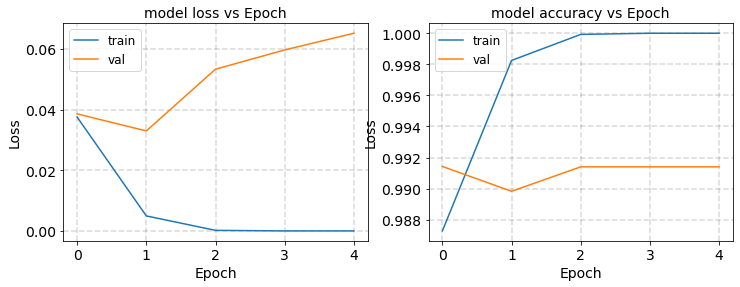

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0529 - accuracy: 0.9873 - val_loss: 0.0331 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 2s - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0407 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0442 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0484 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 1.3844e-04 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9922


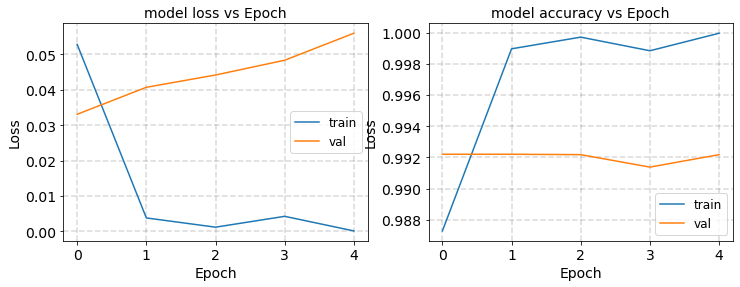

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0552 - accuracy: 0.9884 - val_loss: 0.0278 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 2s - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.0271 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0382 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 2s - loss: 1.6914e-04 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 2.3085e-05 - accuracy: 1.0000 - val_loss: 0.0543 - val_accuracy: 0.9921


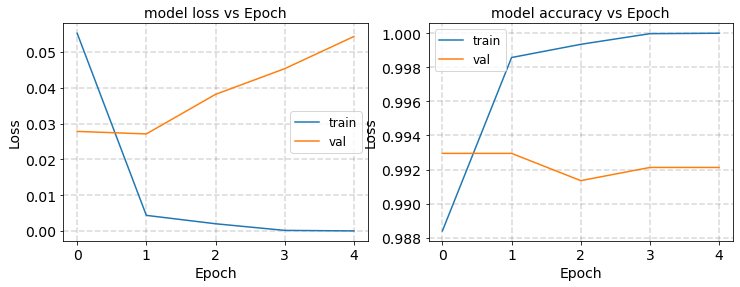

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0800 - accuracy: 0.9878 - val_loss: 0.0440 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0673 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 2s - loss: 3.8444e-05 - accuracy: 1.0000 - val_loss: 0.0879 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 2s - loss: 6.4739e-06 - accuracy: 1.0000 - val_loss: 0.1084 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 2s - loss: 2.0140e-06 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy: 0.9921


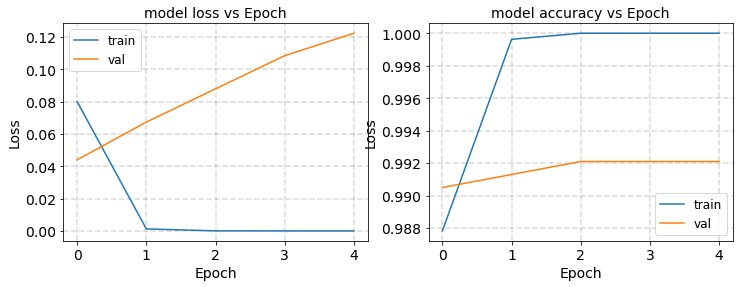

round1 [4 6 7 2]
4
Epoch 1/5
1250/1250 - 2s - loss: 0.1116 - accuracy: 0.9749 - val_loss: 0.0338 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 2s - loss: 0.0103 - accuracy: 0.9973 - val_loss: 0.0385 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0430 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0483 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0533 - val_accuracy: 0.9906


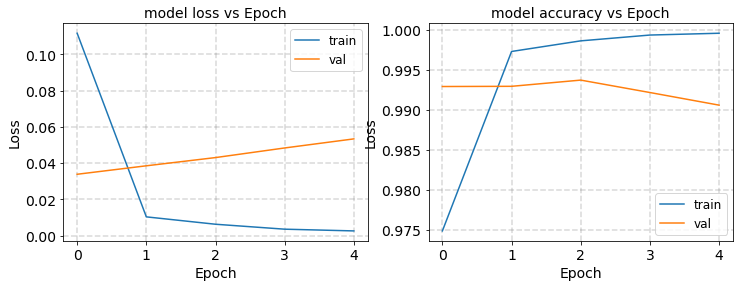

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0799 - accuracy: 0.9792 - val_loss: 0.0427 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 2s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0587 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0800 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 2s - loss: 9.5531e-04 - accuracy: 0.9998 - val_loss: 0.0965 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0764 - val_accuracy: 0.9890


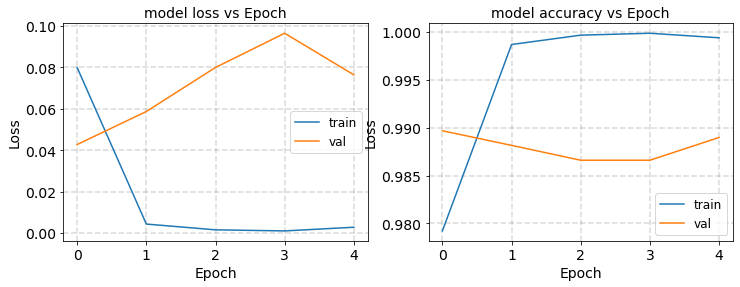

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0749 - accuracy: 0.9868 - val_loss: 0.0529 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0419 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0588 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0669 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 2.2116e-05 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9898


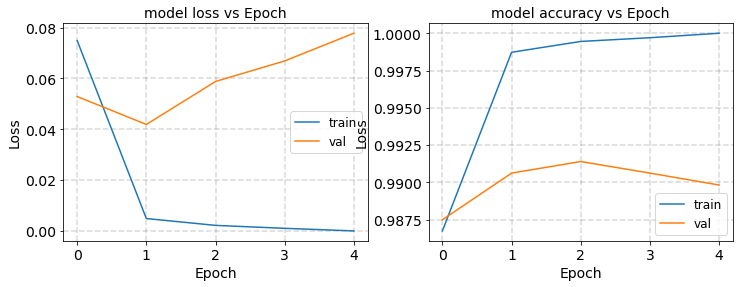

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1404 - accuracy: 0.9667 - val_loss: 0.0617 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 2s - loss: 0.0121 - accuracy: 0.9958 - val_loss: 0.0805 - val_accuracy: 0.9812
Epoch 3/5
1250/1250 - 2s - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0677 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 2s - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0860 - val_accuracy: 0.9804
Epoch 5/5
1250/1250 - 2s - loss: 1.9472e-04 - accuracy: 1.0000 - val_loss: 0.1051 - val_accuracy: 0.9820


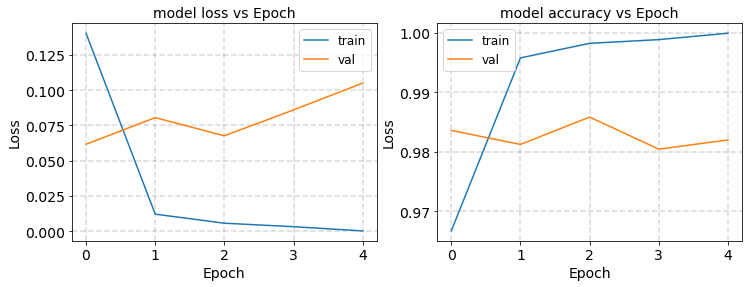

round2 [6 7 2 4]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.0773 - accuracy: 0.9879 - val_loss: 0.0416 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0613 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 2s - loss: 9.7341e-04 - accuracy: 0.9998 - val_loss: 0.0696 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 2s - loss: 6.9091e-04 - accuracy: 0.9998 - val_loss: 0.0720 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 2s - loss: 6.2730e-04 - accuracy: 0.9998 - val_loss: 0.0775 - val_accuracy: 0.9890


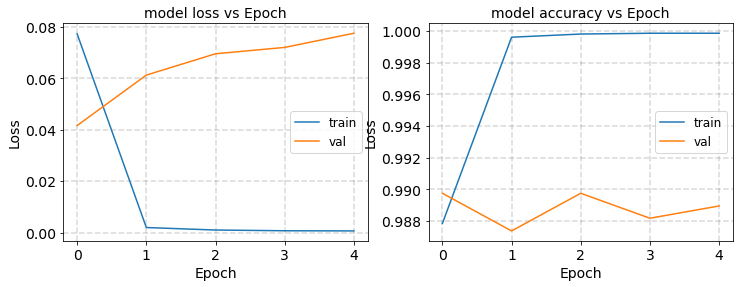

7
Epoch 1/5
1250/1250 - 2s - loss: 0.1079 - accuracy: 0.9837 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0095 - accuracy: 0.9975 - val_loss: 0.0429 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0511 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0716 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0830 - val_accuracy: 0.9906


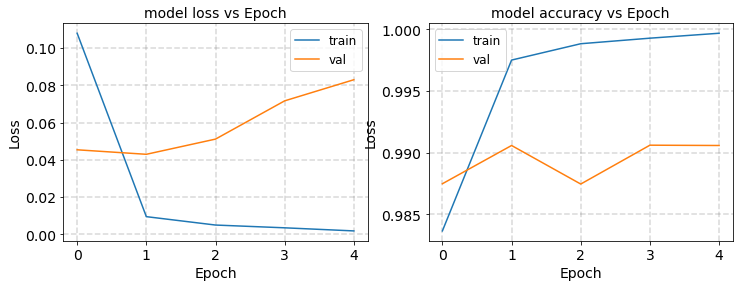

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1325 - accuracy: 0.9750 - val_loss: 0.0557 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 2s - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0617 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 2s - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0837 - val_accuracy: 0.9773
Epoch 4/5
1250/1250 - 2s - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.1120 - val_accuracy: 0.9828
Epoch 5/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.1376 - val_accuracy: 0.9851


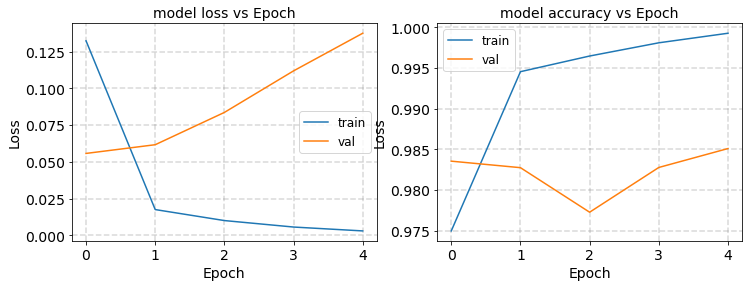

4
Epoch 1/5
1250/1250 - 2s - loss: 0.1498 - accuracy: 0.9689 - val_loss: 0.0603 - val_accuracy: 0.9804
Epoch 2/5
1250/1250 - 2s - loss: 0.0276 - accuracy: 0.9918 - val_loss: 0.0645 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 2s - loss: 0.0171 - accuracy: 0.9957 - val_loss: 0.0905 - val_accuracy: 0.9820
Epoch 4/5
1250/1250 - 2s - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.1088 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 2s - loss: 0.0084 - accuracy: 0.9978 - val_loss: 0.1322 - val_accuracy: 0.9859


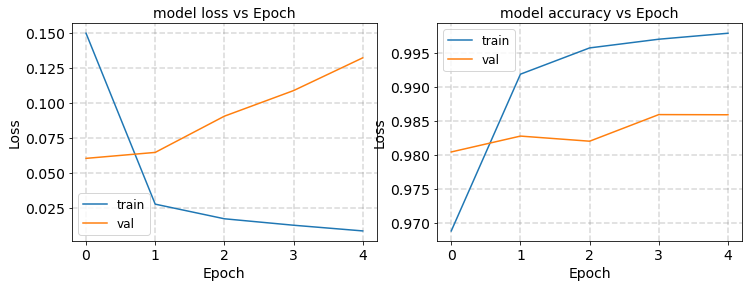

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_43 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_44 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_45 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

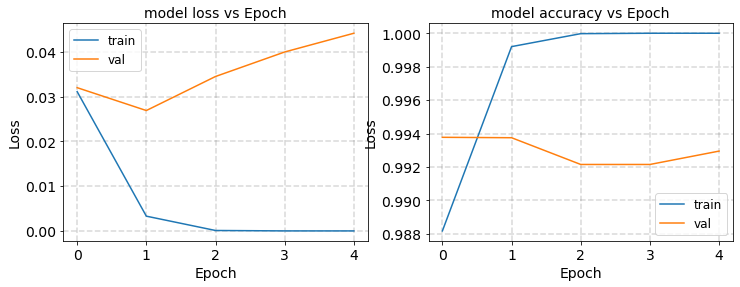

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0502 - accuracy: 0.9905 - val_loss: 0.0336 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 2s - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0407 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0613 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0729 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 2.3630e-05 - accuracy: 1.0000 - val_loss: 0.0817 - val_accuracy: 0.9898


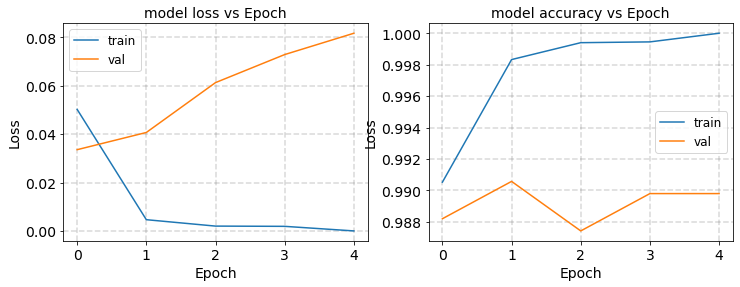

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0877 - accuracy: 0.9840 - val_loss: 0.0513 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0743 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 2s - loss: 5.9197e-05 - accuracy: 1.0000 - val_loss: 0.0943 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 2s - loss: 1.1981e-05 - accuracy: 1.0000 - val_loss: 0.1104 - val_accuracy: 0.9859
Epoch 5/5
1250/1250 - 2s - loss: 3.4129e-06 - accuracy: 1.0000 - val_loss: 0.1194 - val_accuracy: 0.9859


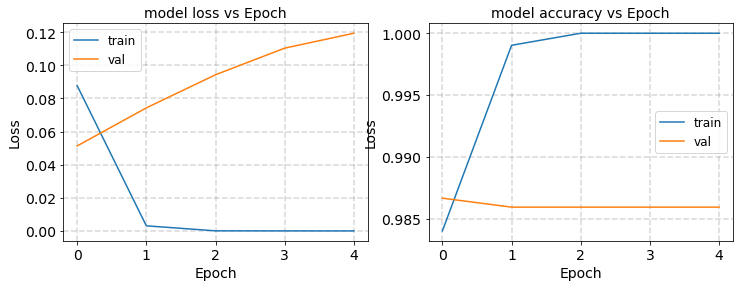

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0660 - accuracy: 0.9909 - val_loss: 0.0307 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0405 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 3.4394e-05 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 2s - loss: 1.1131e-05 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 2s - loss: 4.3885e-06 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 0.9944


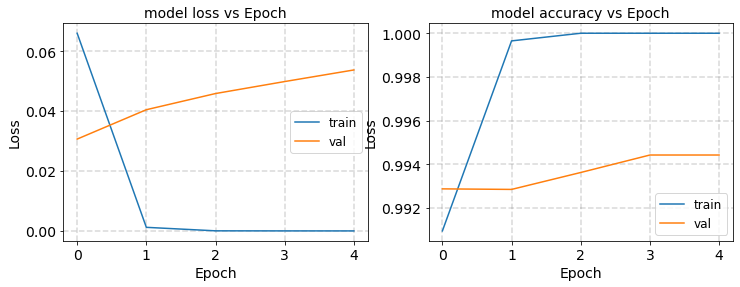

round1 [6 4 2 7]
6
Epoch 1/5
1250/1250 - 2s - loss: 1.8969e-06 - accuracy: 1.0000 - val_loss: 0.0568 - val_accuracy: 0.9944
Epoch 2/5
1250/1250 - 2s - loss: 8.6547e-07 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 2s - loss: 3.9635e-07 - accuracy: 1.0000 - val_loss: 0.0639 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 2s - loss: 1.8626e-07 - accuracy: 1.0000 - val_loss: 0.0669 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 2s - loss: 8.9347e-08 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9944


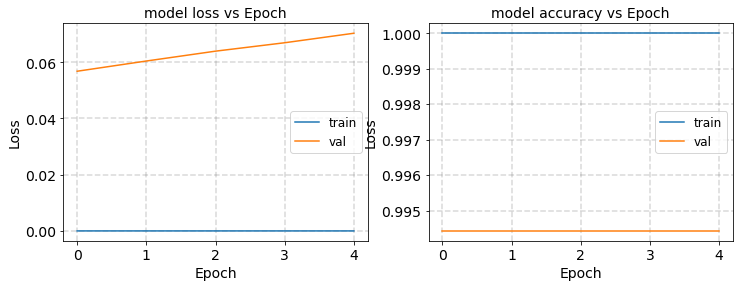

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0843 - accuracy: 0.9877 - val_loss: 0.0478 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0538 - val_accuracy: 0.9899
Epoch 3/5
1250/1250 - 2s - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0732 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 2s - loss: 5.2699e-04 - accuracy: 0.9999 - val_loss: 0.0834 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 2s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0654 - val_accuracy: 0.9882


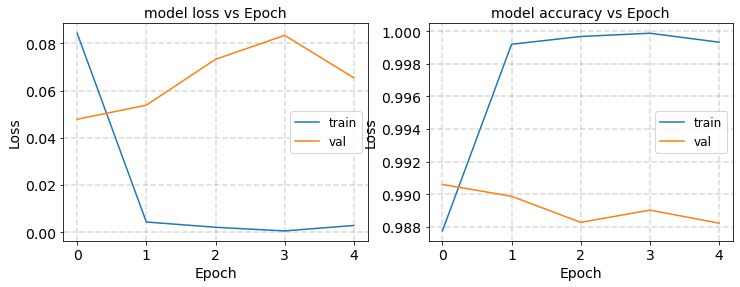

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0483 - accuracy: 0.9893 - val_loss: 0.0723 - val_accuracy: 0.9844
Epoch 2/5
1250/1250 - 2s - loss: 0.0029 - accuracy: 0.9989 - val_loss: 0.0872 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 2s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1079 - val_accuracy: 0.9835
Epoch 4/5
1250/1250 - 2s - loss: 7.2036e-05 - accuracy: 1.0000 - val_loss: 0.1273 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 2s - loss: 1.1176e-05 - accuracy: 1.0000 - val_loss: 0.1397 - val_accuracy: 0.9843


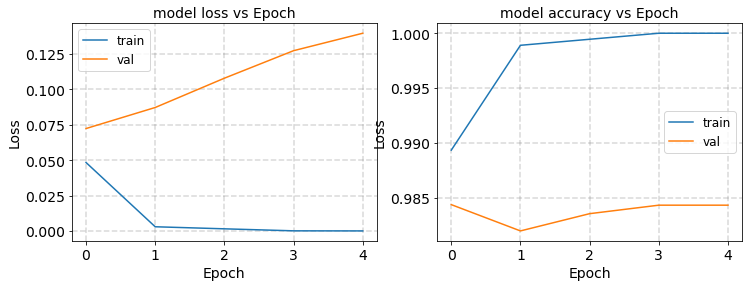

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0852 - accuracy: 0.9896 - val_loss: 0.0378 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 2s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0369 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 5.4604e-05 - accuracy: 1.0000 - val_loss: 0.0488 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 8.1329e-06 - accuracy: 1.0000 - val_loss: 0.0573 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 2.4986e-06 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9929


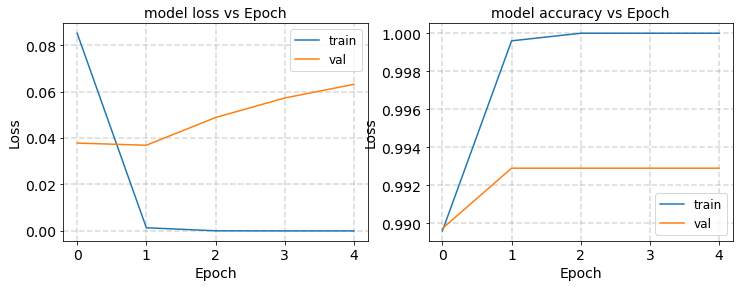

round2 [2 6 7 4]
2
Epoch 1/5
1250/1250 - 2s - loss: 0.1282 - accuracy: 0.9758 - val_loss: 0.0607 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0897 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 2s - loss: 6.8703e-04 - accuracy: 0.9998 - val_loss: 0.1167 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.1050 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 2s - loss: 3.2084e-05 - accuracy: 1.0000 - val_loss: 0.1216 - val_accuracy: 0.9875


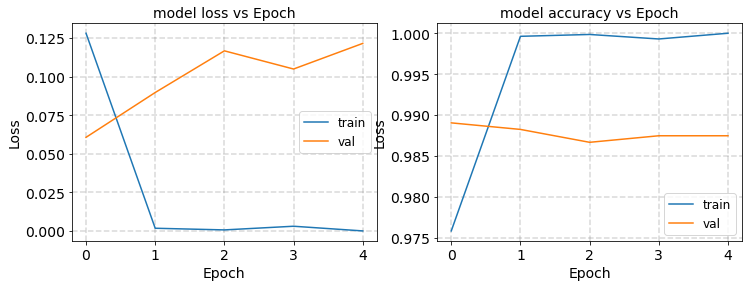

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0810 - accuracy: 0.9865 - val_loss: 0.0265 - val_accuracy: 0.9928
Epoch 2/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0374 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 6.8752e-05 - accuracy: 1.0000 - val_loss: 0.0428 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 1.9897e-05 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 2s - loss: 7.0925e-06 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9937


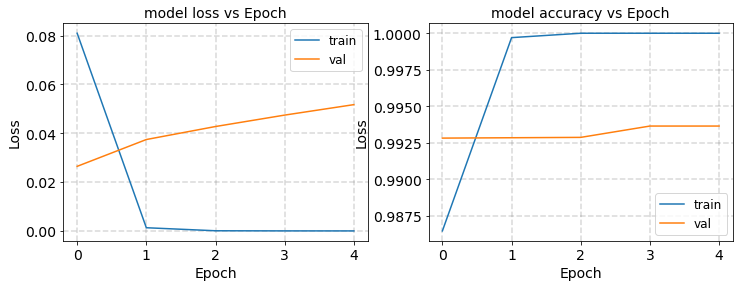

7
Epoch 1/5
1250/1250 - 2s - loss: 0.1279 - accuracy: 0.9812 - val_loss: 0.0388 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 2s - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0459 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0501 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0547 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0641 - val_accuracy: 0.9914


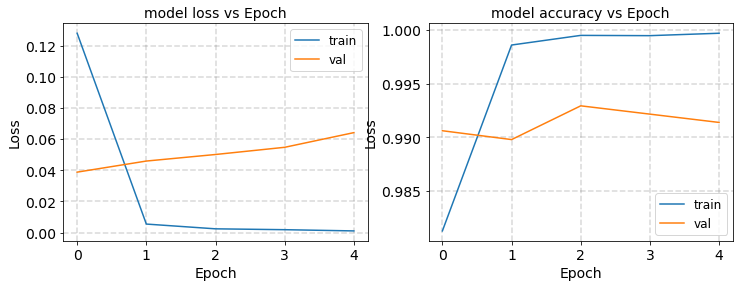

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0708 - accuracy: 0.9879 - val_loss: 0.0406 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 2s - loss: 0.0091 - accuracy: 0.9981 - val_loss: 0.0597 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 2s - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0719 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 2s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0927 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 2s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1120 - val_accuracy: 0.9874


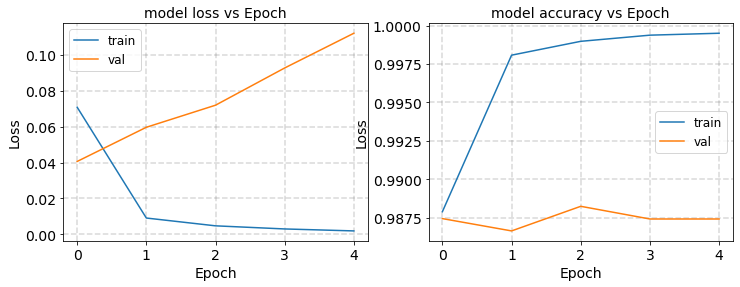

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_51 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

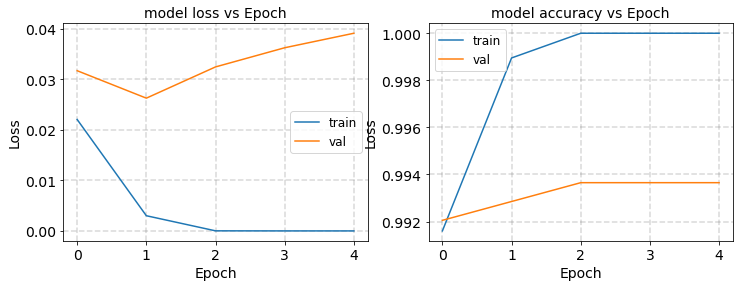

2
Epoch 1/5
1250/1250 - 2s - loss: 0.0529 - accuracy: 0.9900 - val_loss: 0.0438 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 2s - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0697 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9992 - val_loss: 0.0547 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 2s - loss: 4.6804e-05 - accuracy: 1.0000 - val_loss: 0.0668 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 9.9241e-06 - accuracy: 1.0000 - val_loss: 0.0753 - val_accuracy: 0.9898


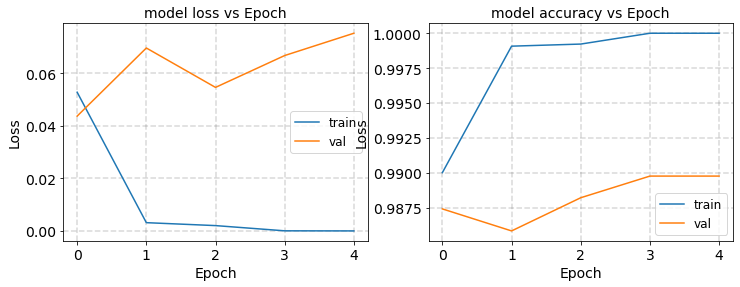

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0738 - accuracy: 0.9829 - val_loss: 0.0326 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0483 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0516 - val_accuracy: 0.9899
Epoch 4/5
1250/1250 - 1s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0473 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 5.0705e-04 - accuracy: 0.9998 - val_loss: 0.0619 - val_accuracy: 0.9898


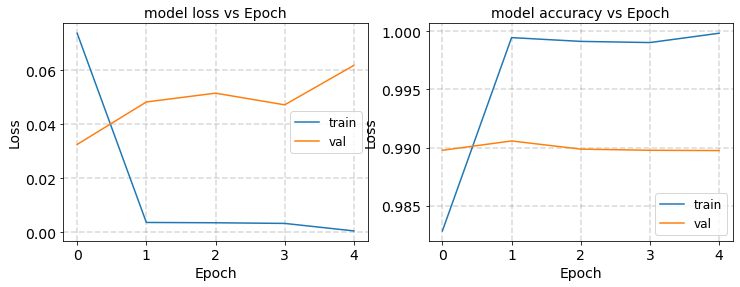

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0652 - accuracy: 0.9889 - val_loss: 0.0506 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 2s - loss: 0.0059 - accuracy: 0.9985 - val_loss: 0.0684 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 1s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0637 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 2s - loss: 1.9477e-04 - accuracy: 0.9999 - val_loss: 0.0756 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 2s - loss: 5.2306e-05 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 0.9898


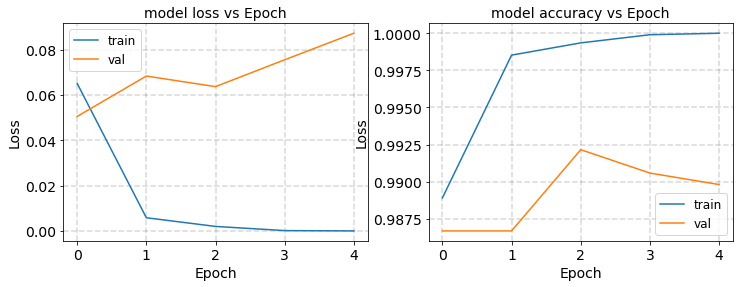

round1 [6 2 7 4]
6
Epoch 1/5
1250/1250 - 2s - loss: 0.0783 - accuracy: 0.9888 - val_loss: 0.0361 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 1s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0546 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 2s - loss: 4.4351e-05 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 1s - loss: 9.8157e-06 - accuracy: 1.0000 - val_loss: 0.0790 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 2s - loss: 2.7849e-06 - accuracy: 1.0000 - val_loss: 0.0900 - val_accuracy: 0.9920


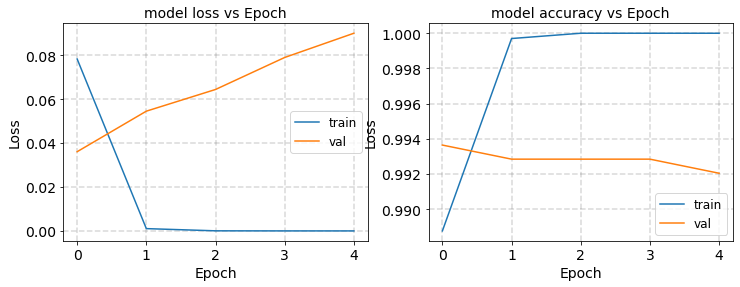

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1067 - accuracy: 0.9807 - val_loss: 0.0500 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 2s - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0471 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0655 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 2s - loss: 7.4587e-04 - accuracy: 0.9998 - val_loss: 0.0591 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 2s - loss: 2.4708e-05 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9898


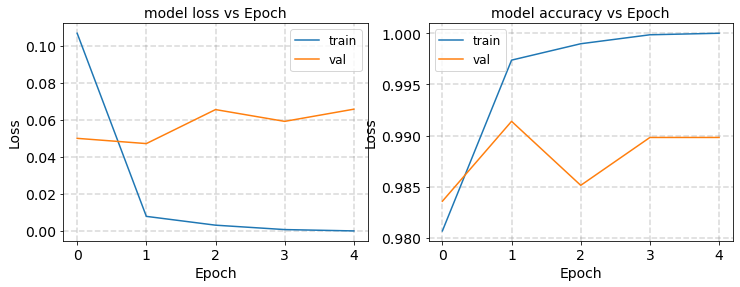

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0922 - accuracy: 0.9824 - val_loss: 0.0281 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.0317 - val_accuracy: 0.9899
Epoch 3/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0462 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 2s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0622 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 2s - loss: 7.1810e-05 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 0.9883


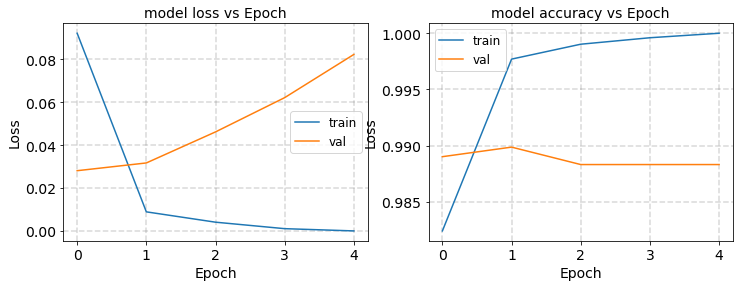

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0896 - accuracy: 0.9817 - val_loss: 0.0485 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0770 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 2s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0807 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 3.9840e-05 - accuracy: 1.0000 - val_loss: 0.0952 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 1.2064e-05 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 0.9914


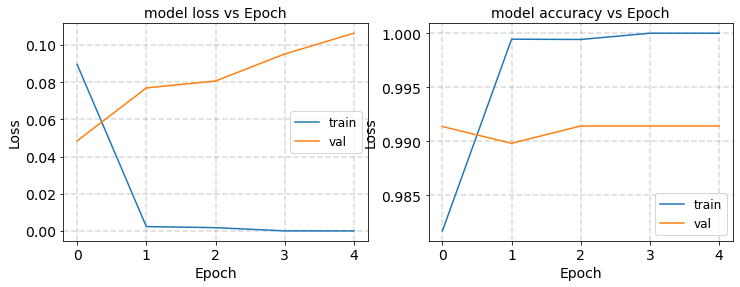

round2 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 2s - loss: 4.6901e-06 - accuracy: 1.0000 - val_loss: 0.1156 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 2s - loss: 1.9534e-06 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 2s - loss: 8.6220e-07 - accuracy: 1.0000 - val_loss: 0.1329 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 3.8969e-07 - accuracy: 1.0000 - val_loss: 0.1416 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 1.7359e-07 - accuracy: 1.0000 - val_loss: 0.1499 - val_accuracy: 0.9914


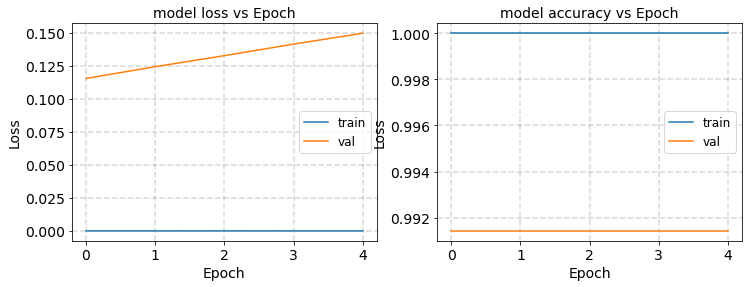

6
Epoch 1/5
1250/1250 - 2s - loss: 0.1103 - accuracy: 0.9880 - val_loss: 0.0567 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0826 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 2s - loss: 8.0001e-05 - accuracy: 1.0000 - val_loss: 0.1163 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 2s - loss: 1.7295e-05 - accuracy: 1.0000 - val_loss: 0.1373 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 2s - loss: 5.7857e-06 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9897


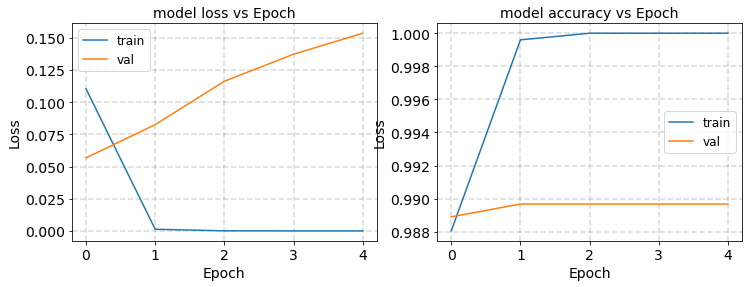

2
Epoch 1/5
1250/1250 - 2s - loss: 0.1044 - accuracy: 0.9884 - val_loss: 0.0753 - val_accuracy: 0.9836
Epoch 2/5
1250/1250 - 2s - loss: 0.0036 - accuracy: 0.9985 - val_loss: 0.1034 - val_accuracy: 0.9821
Epoch 3/5
1250/1250 - 2s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.1231 - val_accuracy: 0.9828
Epoch 4/5
1250/1250 - 2s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.1244 - val_accuracy: 0.9835
Epoch 5/5
1250/1250 - 2s - loss: 1.5350e-04 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9851


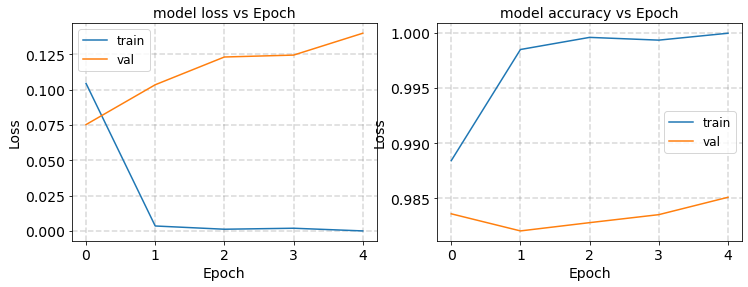

7
Epoch 1/5
1250/1250 - 2s - loss: 0.0750 - accuracy: 0.9900 - val_loss: 0.0493 - val_accuracy: 0.9868
Epoch 2/5
1250/1250 - 2s - loss: 0.0041 - accuracy: 0.9984 - val_loss: 0.0664 - val_accuracy: 0.9891
Epoch 3/5
1250/1250 - 2s - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0734 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 9.8742e-05 - accuracy: 1.0000 - val_loss: 0.0820 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 2.8272e-05 - accuracy: 1.0000 - val_loss: 0.0926 - val_accuracy: 0.9914


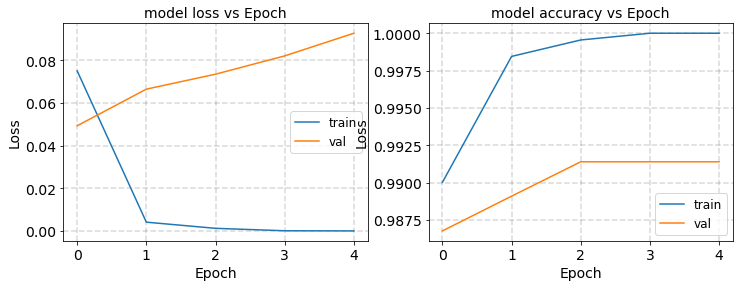

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_55 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_56 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_57 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 260       
Total params: 62,980
Trainable params: 62,980
Non-trainable params: 0
_________________________________________________

In [4]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_seq_prune_0_4_64_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=64,
                                  num_output_nodes=4,
                                  pruning=None,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_0_4_64_run0  1.93128          1.9094      0.0125889   
2467_seq_prune_0_4_64_run1  1.88366         1.90911      0.0125167   
2467_seq_prune_0_4_64_run2  1.85563         1.85057      0.0156052   
2467_seq_prune_0_4_64_run3  1.91152          1.9291     0.00958408   
2467_seq_prune_0_4_64_run4  2.05557         2.01031      0.0240501   
2467_seq_prune_0_4_64_run5  1.94864         1.92479      0.0162744   
2467_seq_prune_0_4_64_run6  1.95606         1.90321      0.0138721   
2467_seq_prune_0_4_64_run7  1.84974         1.82107      0.0141947   
2467_seq_prune_0_4_64_run8  1.95881         1.94009      0.0165601   
2467_seq_prune_0_4_64_run9  1.82622         1.82472     0.00896633   

                           Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_0_4_64_run0     0.00281496         90     0.2           No   
2467_seq_prune_0_4_64_run1     0.00279882          0       0          Yes   
2467_seq_prune_0_4_64_run2     0.00348943         55     0.9           No   
2467_seq_prune_0_4_64_run3     0.00214306          5     0.1           No   
2467_seq_prune_0_4_64_run4     0.00537777        100       0          Yes   
2467_seq_prune_0_4_64_run5     0.00363906         95     0.1           No   
2467_seq_prune_0_4_64_run6     0.00310191        100       0          Yes   
2467_seq_prune_0_4_64_run7     0.00317402        100       0          Yes   
2467_seq_prune_0_4_64_run8     0.00370296         90     0.2           No   
2467_seq_prune_0_4_64_run9     0.00200493         50       1           No   

                           Direction  Accuracy  
2467_seq_prune_0_4_64_run0    larger   0.90055  
2467_seq_prune_0_4_64_run1   smaller  0.956025  
2467_seq_prune_0_4_64_run2    larger  0.937975  
2467_seq_prune_0_4_64_run3   smaller   0.92315  
2467_seq_prune_0_4_64_run4    larger  0.933225  
2467_seq_prune_0_4_64_run5    larger  0.962375  
2467_seq_prune_0_4_64_run6    larger    0.9326  
2467_seq_prune_0_4_64_run7    larger  0.941225  
2467_seq_prune_0_4_64_run8    larger   0.95855  
2467_seq_prune_0_4_64_run9    larger    0.9302

#### Save dataframe

In [6]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_0_4_64_run0  1.93128          1.9094      0.0125889   
2467_seq_prune_0_4_64_run1  1.88366         1.90911      0.0125167   
2467_seq_prune_0_4_64_run2  1.85563         1.85057      0.0156052   
2467_seq_prune_0_4_64_run3  1.91152          1.9291     0.00958408   
2467_seq_prune_0_4_64_run4  2.05557         2.01031      0.0240501   
2467_seq_prune_0_4_64_run5  1.94864         1.92479      0.0162744   
2467_seq_prune_0_4_64_run6  1.95606         1.90321      0.0138721   
2467_seq_prune_0_4_64_run7  1.84974         1.82107      0.0141947   
2467_seq_prune_0_4_64_run8  1.95881         1.94009      0.0165601   
2467_seq_prune_0_4_64_run9  1.82622         1.82472     0.00896633   

                           Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_0_4_64_run0     0.00281496         90     0.2           No   
2467_seq_prune_0_4_64_run1     0.00279882          0       0          Yes   
2467_seq_prune_0_4_64_run2     0.00348943         55     0.9           No   
2467_seq_prune_0_4_64_run3     0.00214306          5     0.1           No   
2467_seq_prune_0_4_64_run4     0.00537777        100       0          Yes   
2467_seq_prune_0_4_64_run5     0.00363906         95     0.1           No   
2467_seq_prune_0_4_64_run6     0.00310191        100       0          Yes   
2467_seq_prune_0_4_64_run7     0.00317402        100       0          Yes   
2467_seq_prune_0_4_64_run8     0.00370296         90     0.2           No   
2467_seq_prune_0_4_64_run9     0.00200493         50       1           No   

                           Direction  Accuracy  
2467_seq_prune_0_4_64_run0    larger   0.90055  
2467_seq_prune_0_4_64_run1   smaller  0.956025  
2467_seq_prune_0_4_64_run2    larger  0.937975  
2467_seq_prune_0_4_64_run3   smaller   0.92315  
2467_seq_prune_0_4_64_run4    larger  0.933225  
2467_seq_prune_0_4_64_run5    larger  0.962375  
2467_seq_prune_0_4_64_run6    larger    0.9326  
2467_seq_prune_0_4_64_run7    larger  0.941225  
2467_seq_prune_0_4_64_run8    larger   0.95855  
2467_seq_prune_0_4_64_run9    larger    0.9302

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.01011593,  0.02824455, -0.02041259, ..., -0.03821869,
        -0.01648074, -0.01910556],
       [ 0.0040789 ,  0.00576543,  0.04401762, ...,  0.01734413,
         0.0058777 , -0.01798396],
       [ 0.07831117, -0.03790278, -0.02537611, ..., -0.00142575,
        -0.06483133,  0.06229568],
       ...,
       [ 0.03736118, -0.03671181,  0.01810545, ...,  0.07676705,
        -0.07024929, -0.03274638],
       [ 0.02192557, -0.0134372 , -0.02478164, ..., -0.07034072,
         0.0588061 ,  0.03718079],
       [-0.00885551, -0.03412491,  0.03109671, ..., -0.0024665 ,
         0.04895595,  0.04782594]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.9312815932033573
1.9093979145833697
0.012588893233624965
0.0028149621031872563
90.0
0.2
No
larger
0.9005500078201294
